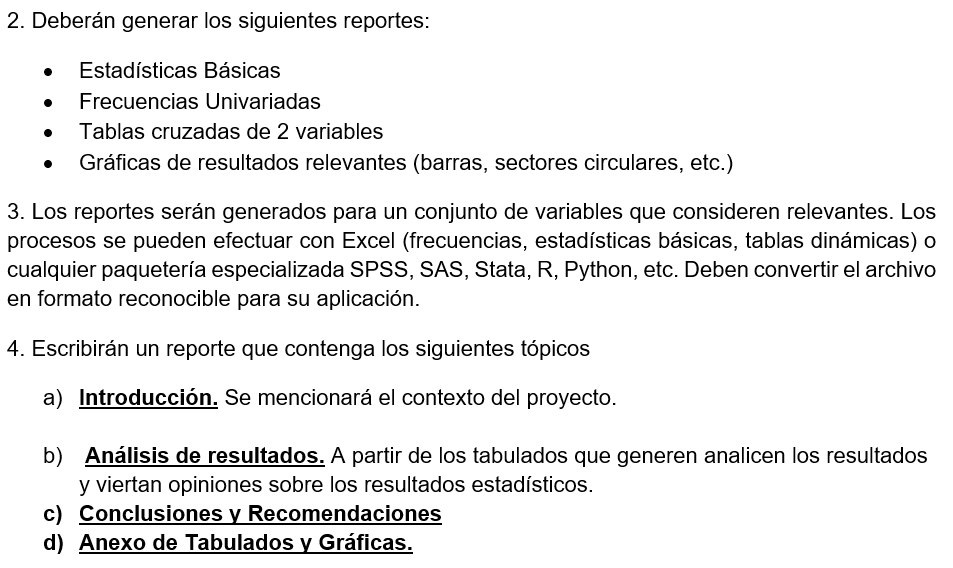

<h1><center> PROYECTO FINAL MUESTREO </center></h1>

> __AUTOR__: David Montaño Castro.

> __Universidad Nacional Autónoma de México__.

# Paqueterías

In [6]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import scipy.stats as st
from nltk.corpus import stopwords
import scipy.stats as stats
from scipy.stats import f_oneway

from wordcloud import WordCloud


from fuzzywuzzy import fuzz
from fuzzywuzzy import process

pd.options.mode.chained_assignment = None 
plt.rcParams["figure.figsize"] = (15,12)
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 200)

# Conjunto de datos

El presente conjunto de datos fue proporcionado por el profesor Francisco Sánchez Villareal. 

Se levanto una encuenta posiblemente física para su posterior captura digital. Por tanto, errores de captura están presentes y se indicará siempre que se tenga sospecha de este suceso. Además, los valores nulos no son marcados como tal (Null o NaN), sino con espacios en blanco (" "). Por convención, se modificará y se llevarán a valores NaN típicos en el manejo de datos. 

In [7]:
df= pd.read_csv("BASE DE CONTRATANTES 2018 V2.csv",encoding='latin-1').replace(r'^\s*$', np.nan, regex=True)
df.head(3)

,FOLIO,EMPRESA,PUESTO,DIA,MES,ANIO,HORA,MIN,ACTP,SECTOR,FUN1,FUN2,FUN3,CAR1,CAR2,CAR3,PERIODICO,INTERNET,EMP,BOLSA,RECOM,EDAD,EDAD2,GENERO,GENERO2,VIAJA,EST,PASAN,LIC,POS,HORAEST,PROM,PROM2,DOMINIO,IT,ILE,IH,FT,FLE,FH,AT,ALE,AH,OTRO,OT,OLE,OH,EXP,EXPA,CARTA,EXAMED,EXAPSI,EXATEC,PREFE,INST1,INST2,INST3,COMU,EQUI,LIDER,CREA,PPER,TRAP,COMP,DEMO,RIES,ECONO,FINAN,IEST,PROBA,IDEO,MER,MODMAT,ST,MENC,PENS,DANIO,SPER,SISD,OTR_1,OTRO1,OTR_2,OTRO2,OFF,PAQUE,PAQ1,PAQ2,LENG,LENG1,LENG2,LENG3,PROG,DISE,RED,MBD,TECEXP,CII,MT,CTO,DEFI_1,DEFI_2,DEFI_3,DEFI_4,CURTEC,CURIDEO,DIPMA,ESTPUES,OBS
0,1,COMISIÓN NACIONAL BANCARIA Y DE VALORES,INSPECTOR,8,11,18,14,15,SUPERVISIÓN BANCARIA,1,ANÁLISIS FINANCIERO Y OPERATIVO,ASUNTOS DE TRANSPARENCIA,ASPECTOS JURÍDICOS,ACTUARIA,CONTADURIA,ECONOMIA,NaN,X,NaN,NaN,X,N,0,N,NaN,S,X,NaN,NaN,NaN,S,S,8,S,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,S,S,S,S,N,NaN,NaN,NaN,5,5,5,4,5,5,2,1,2,2,2,2,2,2,1,2,1,1,1,1,1,2,NaN,0,NaN,0,S,N,NaN,NaN,N,NaN,NaN,NaN,1,1,1,1,S,S,S,S,DISPOSICIÓN E INICIATIVA,PEREZA,APERTURA PARA APRENDER Y RECONOCER LIMITACIONES,NaN,S,S,S,S,NaN
1,2,BANCO DEL AHORRO NACIONAL Y SERVICIOS FINANCIEROS,SUBJEFE DE ÁREA,9,11,18,13,5,BANCA DE DESARROLLO,1,REGULAMIENTO Y SELECCIÓN DE PERSONAL,INGRESO,NaN,ADMINISTRACIÓN,ACTUARIA,NaN,NaN,NaN,NaN,X,NaN,N,NaN,N,NaN,N,X,X,X,X,N,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,0,S,S,S,S,N,NaN,NaN,NaN,4,4,4,4,4,4,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,S,N,NaN,NaN,N,NaN,NaN,NaN,2,2,2,2,S,S,S,N,NaN,NaN,NaN,NaN,S,N,S,S,NaN
2,3,MAPFRE,COORDINADOR SUSCRIPCIÓN,9,11,18,11,30,ASEGURADORA MULTIRAMO,2,SUSCRIPCIÓN,TARIFAS,NaN,ADMINISTRACIÓN,FINANZAS,ECONOMIA,NaN,NaN,X,X,X,N,0,N,NaN,N,X,X,X,X,S,N,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,N,S,S,S,N,NaN,NaN,NaN,4,5,3,5,5,5,3,2,2,2,2,3,3,3,2,3,3,2,2,3,2,2,NaN,0,NaN,0,S,N,NaN,NaN,N,NaN,NaN,NaN,2,2,2,3,S,S,S,N,NaN,NaN,NaN,NaN,S,N,S,S,NaN


#### Distribución del conjunto de datos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Columns: 108 entries, FOLIO to OBS
dtypes: float64(5), int64(28), object(75)
memory usage: 238.1+ KB


Se van a eliminar todas aquellas columnas que no aporten nada (llenas de NaN). En este caso, toda aquella columna con 282 valores NaN es inútil. 

In [9]:
df.isna().sum().where(lambda x: x > 200).dropna()

PERIODICO    261.0
EMP          210.0
GENERO2      279.0
FT           279.0
FLE          280.0
FH           282.0
AT           282.0
ALE          282.0
AH           282.0
OTRO         281.0
OT           282.0
OLE          281.0
OH           281.0
INST1        232.0
INST2        250.0
INST3        268.0
OTR_1        254.0
OTR_2        273.0
PAQ2         201.0
LENG3        218.0
DEFI_4       244.0
OBS          229.0
dtype: float64

In [10]:
df = df.dropna(how = "all",axis = 1).drop(columns = ["FOLIO","HORA","MIN","DIA","MES","ANIO"])

# Análisis Estadístico

## Encuestados

### Empresa

#### Número de empresas únicas

188 empresas participaron. 

In [11]:
df.EMPRESA.nunique()

188

#### Presencia de empresas

Las siguientes empresas tuvieron mayor número de registros en la encuesta

In [14]:
df.EMPRESA.value_counts().tail(20)

AMERICAN EXPRESS                                     1
DECHRA BROVEL SA DE CV                               1
MEDIACCESS SEGUROS DE SALUD                          1
BANCO DE MÉXICO                                      1
UNAM FACULTAD DE CIENCIAS                            1
LA ESCUELA DE LANCASTER                              1
GRUPO MEXICANO DE SEGUROS S.A. DE C.V.               1
BANSEFI SNC                                          1
GRUPO NACIONAL PROVINCIAL                            1
INBURSA                                              1
CAMARA DE DIPUTADOS                                  1
BANOBRAS                                             1
AGV S.A DE C.V                                       1
BANSEFI                                              1
BBVA BANCOMER SERVICIOS ADMINISTRATIVOS              1
CODUSEF                                              1
COMISIÓN NACIONAL DE SEFGUROS Y FIANZAS              1
CFENERGIA                                            1
GRUPO NACI

### Cargo

__NOTA__: Algunos textos tienen errores de captura.

Se utilizará la distancia de Levenshtein para corregir algunos problemas de captura en textos. Después, manualmente se corregirán algunos términos del inglés al español.

In [8]:
nuevos_puestos1 = []
for puesto in df.PUESTO.dropna().apply(lambda x : x.split()[0]) :

    if process.extractOne(puesto, df.PUESTO.dropna().apply(lambda x: x.split()[0]).value_counts().head(9).index)[1] >= 65:
        nuevos_puestos1.append(process.extractOne(puesto, df.PUESTO.dropna().apply(lambda x: x.split()[0]).value_counts().head(9).index,score_cutoff = 65)[0])
        
    else:
        nuevos_puestos1.append(puesto)
        

In [9]:
cargo10 = pd.Series(nuevos_puestos1).replace("PRODUCT","DIRECTOR").replace("MANAGER","GERENTE").replace("CEO","JEFE").replace("CHIEF","JEFE").replace("ACT","ACTUARIO").value_counts().head(10)

cargo10_puestos = list(cargo10.index)
cargo10_valores = list(cargo10.values)

cargo10_puestos.append("OTROS")
cargo10_valores.append(83)

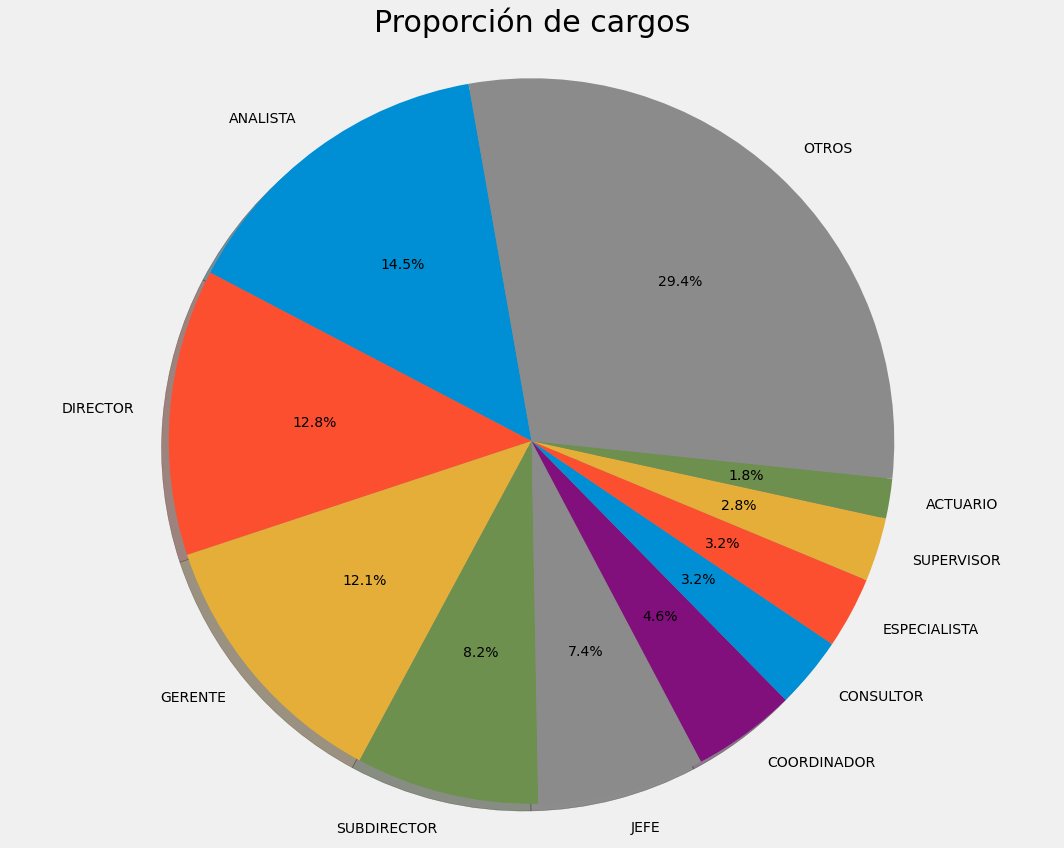

In [10]:
labels = cargo10_puestos
sizes = cargo10_valores
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=100,textprops={'fontsize': 14, "color": "black"})
plt.title("Proporción de cargos", size = 30)

plt.axis('equal')
plt.tight_layout()
#plt.savefig("1cargos",bbox_inches = "tight", pad_inches = 0)
plt.show()

### Sector

In [11]:
round(df.SECTOR.replace({1:"Público",2:"Privado"}).value_counts(normalize = True)*100,0)

Privado    68.0
Público    32.0
Name: SECTOR, dtype: float64

### Actividad Principal de la Institución

In [12]:
act_palabras = [x for x in list(chain(*df.ACTP.apply(lambda x: x.split()).to_list())) if x not in ["SECTOR","EL","LA","Y","EN","DEL","E","DE","PARA","/","AL","A","LAS","LOS","AREA","BD"]]

act_texto = " ".join(act_palabras).replace("INVESTIGACION","INVESTIGACIÓN").replace("FINANCIERO","FINANCIERA").replace("FINANCIEROS","FINANCIERA").replace("FINANCIERAS","FINANCIERA").replace("BANCARIA","BANCA").replace("BANCARIO","BANCA").replace("SEGURO","ASEGURADORA")

__RECOMENDACIÓN__: Categorizar bien las actividades pricipales de la institución para poder hacer tablas cruzadas.

__RECOMENDACIÓN__: Dar una limpieza más profunda al conjunto de datos (en particular a los textos).

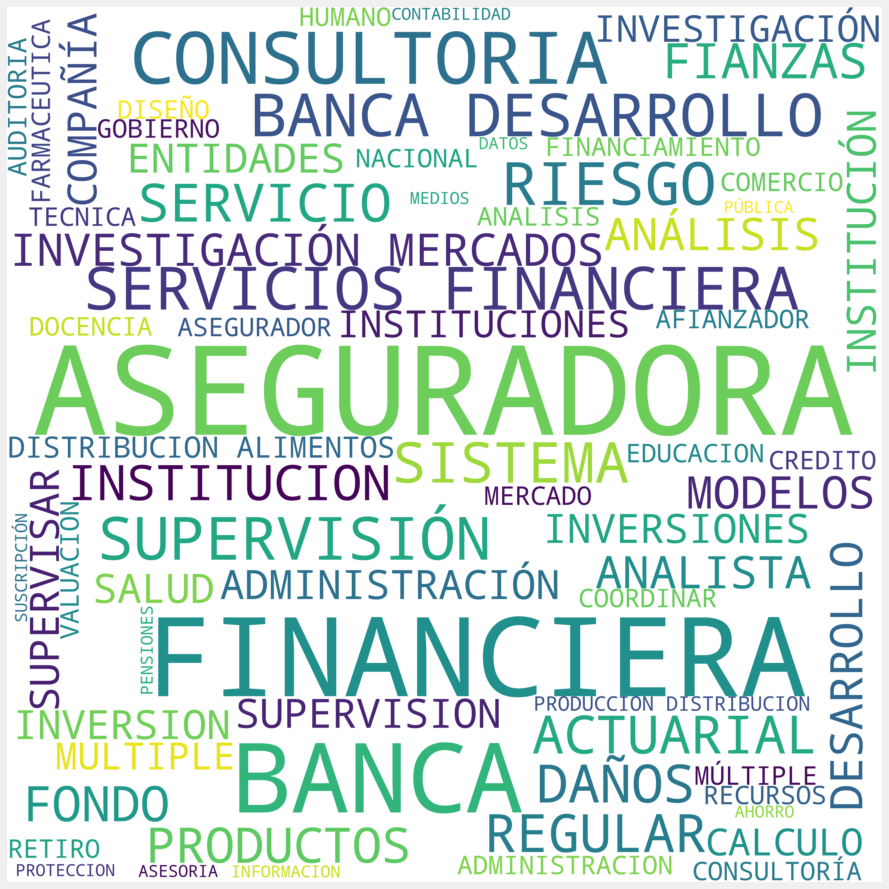

In [13]:
cloud = WordCloud(width = 8000,height = 8000, background_color = "white",max_words = 70).generate(act_texto)
    
plt.figure(figsize=(25,15))
plt.imshow(cloud, interpolation = "bilinear")
#t.title(idioma, fontsize = 20, color = "black")
plt.axis("off")
#plt.savefig("21ACTP" ,bbox_inches = "tight", pad_inches = 0)
plt.show()

### Funciones principales

In [14]:
fun_palabras = [x for x in list(chain(*df["FUN1"].append(df["FUN1"]).append(df["FUN3"]).dropna().apply(lambda x: x.split()).to_list())) if x not in ["LO","POR","CON","SECTOR","EL","LA","Y","EN","DEL","E","DE","PARA","/","AL","A","LAS","LOS","AREA","BD"]]

fun_texto = " ".join(fun_palabras).replace("ANÁLISI","ANAISIS").replace("ANAISISS","ANAISIS").replace("RIESGOS","RIESGO").replace("FINANCIERA","FINANCIERO")

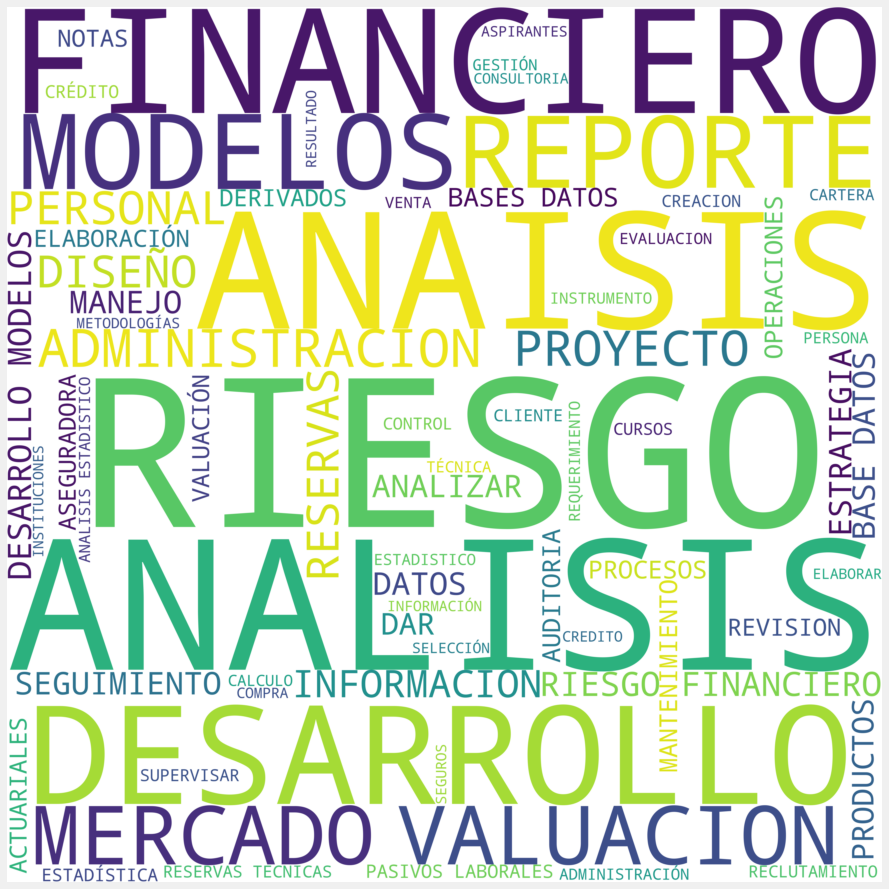

In [15]:
cloud = WordCloud(width = 8000,height = 8000, background_color = "white",max_words = 70).generate(fun_texto)
    
plt.figure(figsize=(25,15))
plt.imshow(cloud, interpolation = "bilinear")
#t.title(idioma, fontsize = 20, color = "black")
plt.axis("off")
#plt.savefig("3FUN" ,bbox_inches = "tight", pad_inches = 0)
plt.show()

### Carreras Afines

In [16]:
df["CAR1"].append(df["CAR2"]).append(df["CAR3"]).dropna()

0                ACTUARIA
1          ADMINISTRACIÓN
2          ADMINISTRACIÓN
3      CONTADURÍA PÚBLICA
5                ACTUARIA
              ...        
277              ACTUARIA
278              ACTUARIA
279           MATEMÁTICAS
280         MERCADOTECNIA
281            INGENIEROS
Length: 749, dtype: object

Por alguna extraña razón Python no identifica "INGENIERIA" ni "ING". Tendré que crear las listas manualmente.

In [17]:
df["CAR1"].append(df["CAR2"]).append(df["CAR3"]).dropna().replace("ING","INGENIERIA").replace(r"ING[.]","INGENIERIA",regex = True).replace(r"INGENIERI?O[Ss]?","INGENIERIA",regex = True).replace("INGENIERÍA","INGENIERIA").replace("CONTADURÍA","CONTADURIA").replace("MATEMATICAS APLICADAS","MATEMATICAS").replace("FIANANZAS","FINANZAS").replace("CONTABILIDAD","CONTADURIA").replace(r"ADM.*","ADMINISTRACIÓN", regex = True).replace(r"M[EA]TEM[ÁA]TIC[AO]S?","MATEMATICAS",regex = True).replace("COMPUTACION","INFORMATICA").replace("PROGRAMACION","INFORMATICA").apply(lambda x: x.split()[0]).value_counts().head(30)

ACTUARIA                185
ECONOMIA                118
MATEMATICAS             110
ADMINISTRACIÓN           61
INGENIERIA               50
CONTADURIA               43
FINANZAS                 30
INFORMATICA              16
DERECHO                  12
INGENIERÍA               11
ESTADISTICA               8
CIENCIAS                  7
LICENCIATURA              6
PSICOLOGIA                6
ING                       6
FISICA                    5
MERCADOTECNIA             4
LICENCIADO                3
INGIENERIAS               3
PEDAGOGIA                 3
CONTADURÍA                3
FISICOS                   2
COMUNICACION              2
FINANCIEROS               2
QUIMICA                   2
MEDICINA                  2
CONTADORES                1
PSICOLOGÍA                1
SOCIOLOGOS                1
ACTUARÍA-MATEMATICAS      1
dtype: int64

In [18]:
CA_index = ["ACTUARIA", "ECONOMIA", "MATEMATICAS","ADMINISTRACION","INGENIERIA","CONTADURIA","FINANZAS","INFORMATICA","DERECHO","ESTADISTICA", "OTRAS"]

CA_values = [185,118,110,61,69,43,32,16,12,8,95]

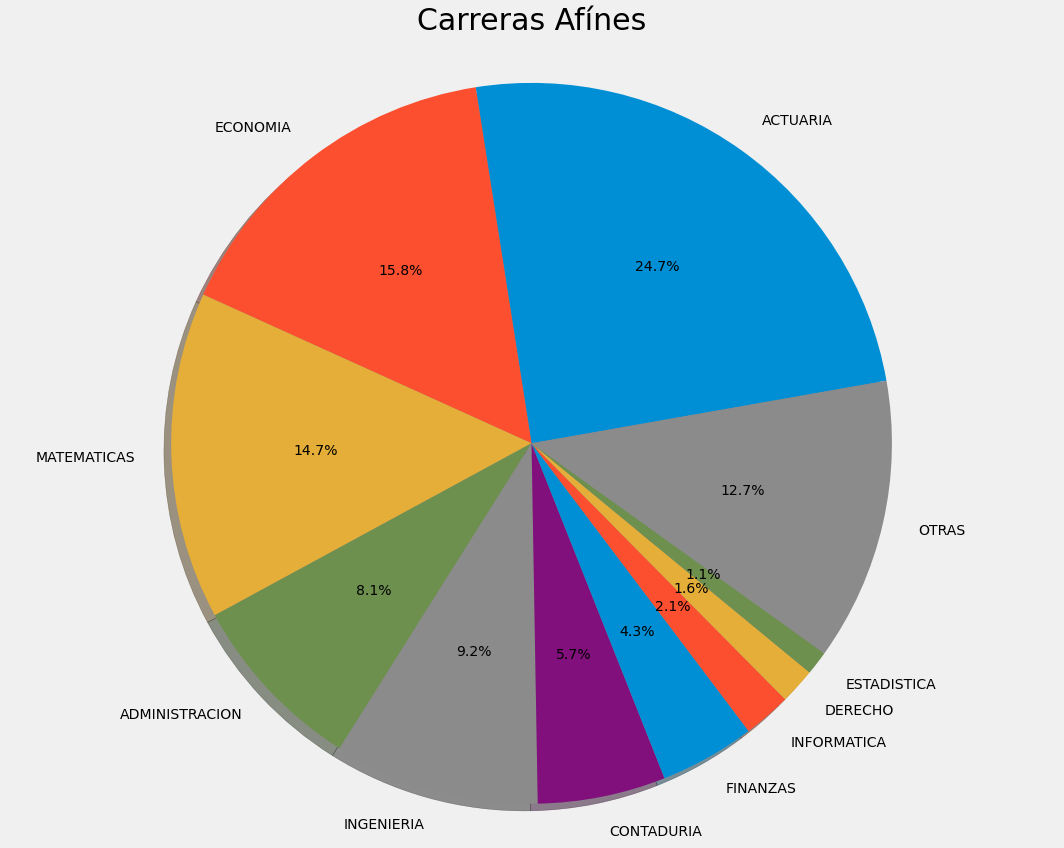

In [19]:
labels = CA_index
sizes = CA_values
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=10,textprops={'fontsize': 14, "color": "black"})
plt.title("Carreras Afínes", size = 30)

plt.axis('equal')
plt.tight_layout()
# plt.savefig("4CA",bbox_inches = "tight", pad_inches = 0)
plt.show()

### Medios de Contratación

In [20]:
df[["PERIODICO","INTERNET","EMP","BOLSA","RECOM"]].replace("X",1).fillna(0).sum(axis = 0)

PERIODICO     21.0
INTERNET     193.0
EMP           72.0
BOLSA        174.0
RECOM        166.0
dtype: float64

Se generó la gráfica en Excel debido a que en Pythón es complicada crearla.

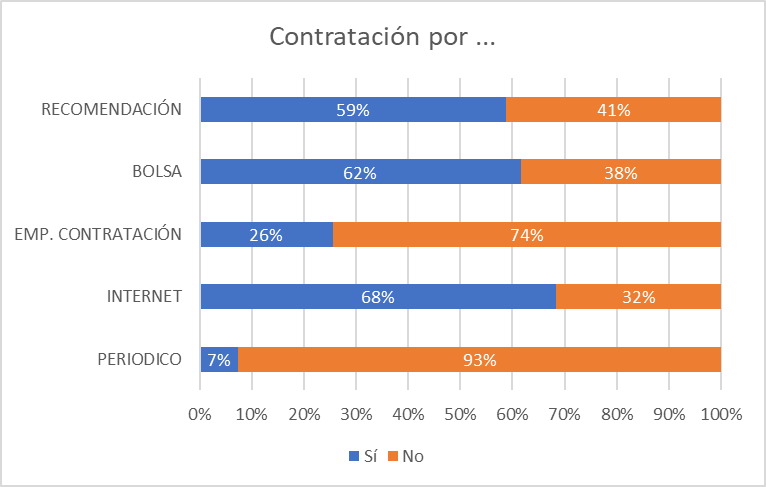

## Requisitos Generales de Ingreso

### Edad

#### Edad Máxima (Si No)

Observar abajo que solo hay 35 datos de edad, dando pauta para pensar que se registro un dato más de "Si" erroneomente.

In [21]:
df.EDAD.value_counts()

N    246
S     36
Name: EDAD, dtype: int64

### Género

#### Preferencia por algún género

In [22]:
df.GENERO.value_counts()

N    279
S      3
Name: GENERO, dtype: int64

#### ¿Cuál preferencia?

In [23]:
df.GENERO2.dropna()

83     F
88     F
232    F
Name: GENERO2, dtype: object

### Viajar

In [24]:
df.VIAJA.value_counts()

N    186
S     96
Name: VIAJA, dtype: int64

## Preparación para primer puesto

In [25]:
df[["EST","PASAN","LIC","POS"]].replace("X",1).fillna(0).sum()

EST      142.0
PASAN    190.0
LIC      244.0
POS      143.0
dtype: float64

###### 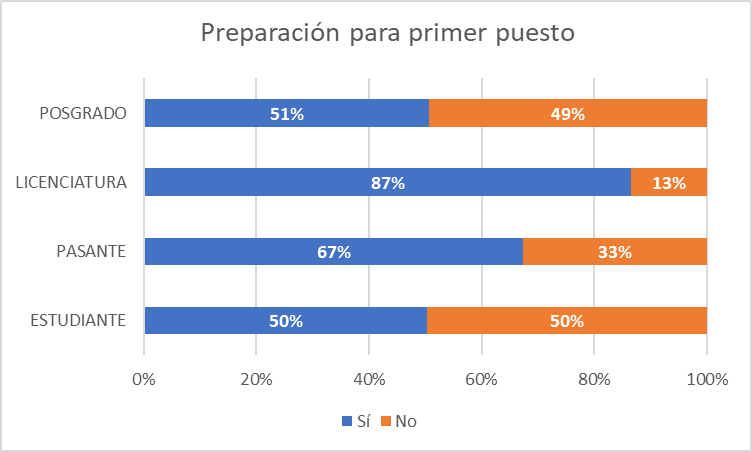

### Promedio Mínimo

In [26]:
df.PROM.value_counts()

N    184
S     82
Name: PROM, dtype: int64

#### ¿Cuánto es el promedio que piden?

In [27]:
df.PROM2.dropna().astype("float").where(lambda x: x > 0).dropna().value_counts()

8.0    64
8.5    12
9.0     6
Name: PROM2, dtype: int64

## Dominio de idiomas



### Inglés

In [28]:
ingles = df[["IT","ILE","IH"]].replace("X",1).fillna(0).sum(axis = 1).replace({3:"Dominio Total",0:"No se requiere", 1: "Dominio Básico",2: "Dominio Medio"}).value_counts()

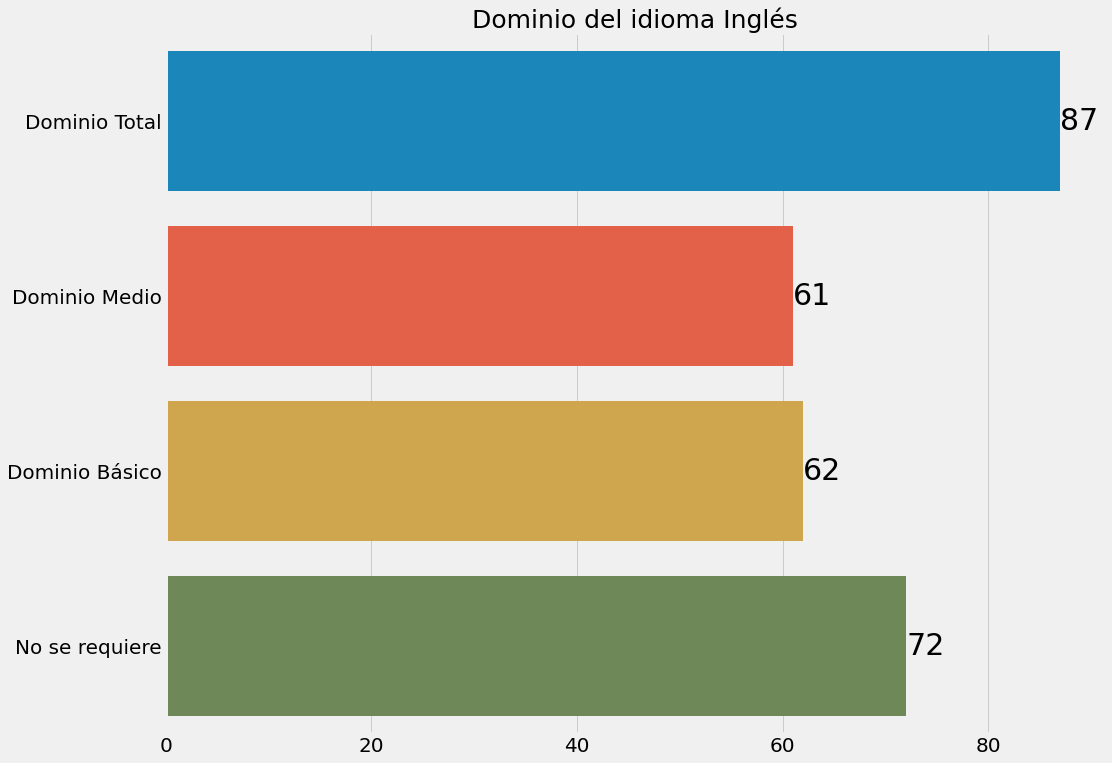

In [29]:
ax = sns.barplot(x = ingles.values, y = ingles.index, order = ["Dominio Total","Dominio Medio","Dominio Básico","No se requiere"])
ax.bar_label(ax.containers[0], size = 30, label_type = "edge")
plt.title("Dominio del idioma Inglés", fontsize = 25)
plt.ylabel("")
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 20)
# plt.savefig("7Ingles",bbox_inches = "tight", pad_inches = 0)
plt.show()

###### Otros requisitos Generales

### Experiencia en el campo

In [30]:
df["EXP"].value_counts()

N    189
S     93
Name: EXP, dtype: int64

In [31]:
exp = df["EXPA"].where(lambda x: x > 0).dropna().value_counts().sort_index()
exp

1.0    33
2.0    21
3.0    14
4.0     1
5.0     2
6.0     1
Name: EXPA, dtype: int64

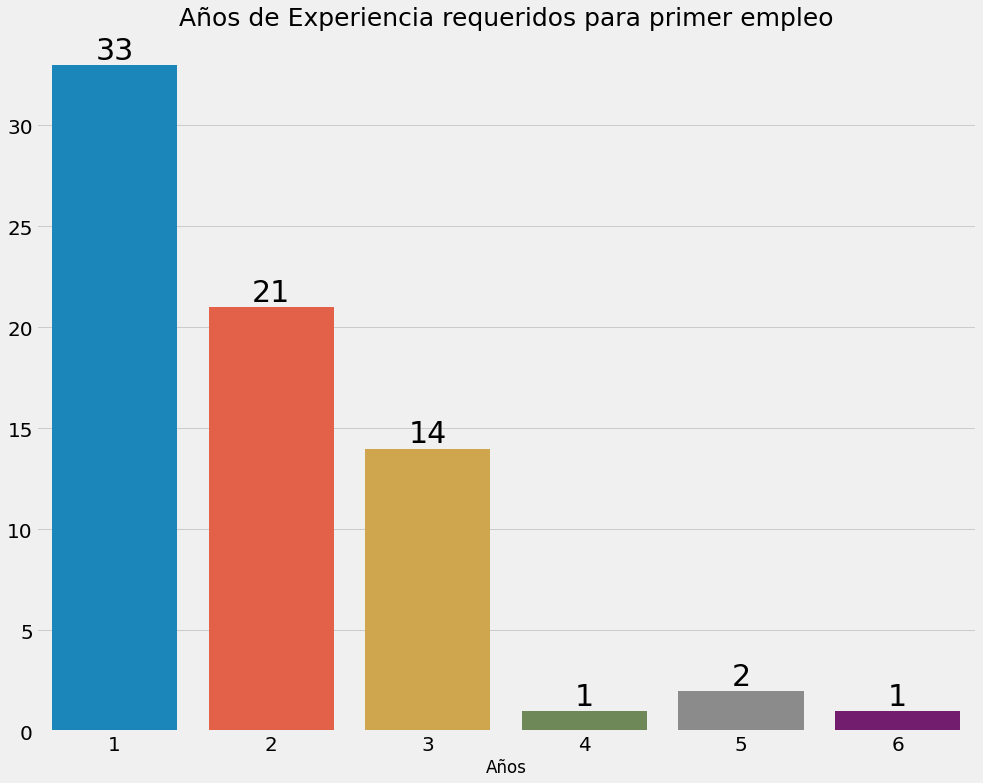

In [32]:
ax = sns.barplot(x = [1,2,3,4,5,6], y = exp.values)
ax.bar_label(ax.containers[0], size = 30, label_type = "edge")
plt.title("Años de Experiencia requeridos para primer empleo", fontsize = 25)
plt.ylabel("")
plt.xlabel("Años")
plt.xticks(size = 20)
plt.yticks(size = 20)
# plt.savefig("8ExpAños",bbox_inches = "tight", pad_inches = 0)
plt.show()

### Preferencia por escuelas

In [33]:
pref = df[["PREFE","INST1","INST2","INST3"]]

In [34]:
pref.PREFE.value_counts()

N    228
S     50
Name: PREFE, dtype: int64

In [27]:
232/(232+50)

0.8226950354609929

In [35]:
Pref1 = pd.Series([x for x in pref["INST1"].dropna().replace(r"(FES ACATLAN|FACULTAD DE CIENCIAS UNAM|UNAM \(MÁS PRÁCTICOS\)|CIENCIAS)","UNAM",regex = True).replace("UNIVERSIDAD LA SALLE","SALLE") if len(x) < 6]).value_counts()

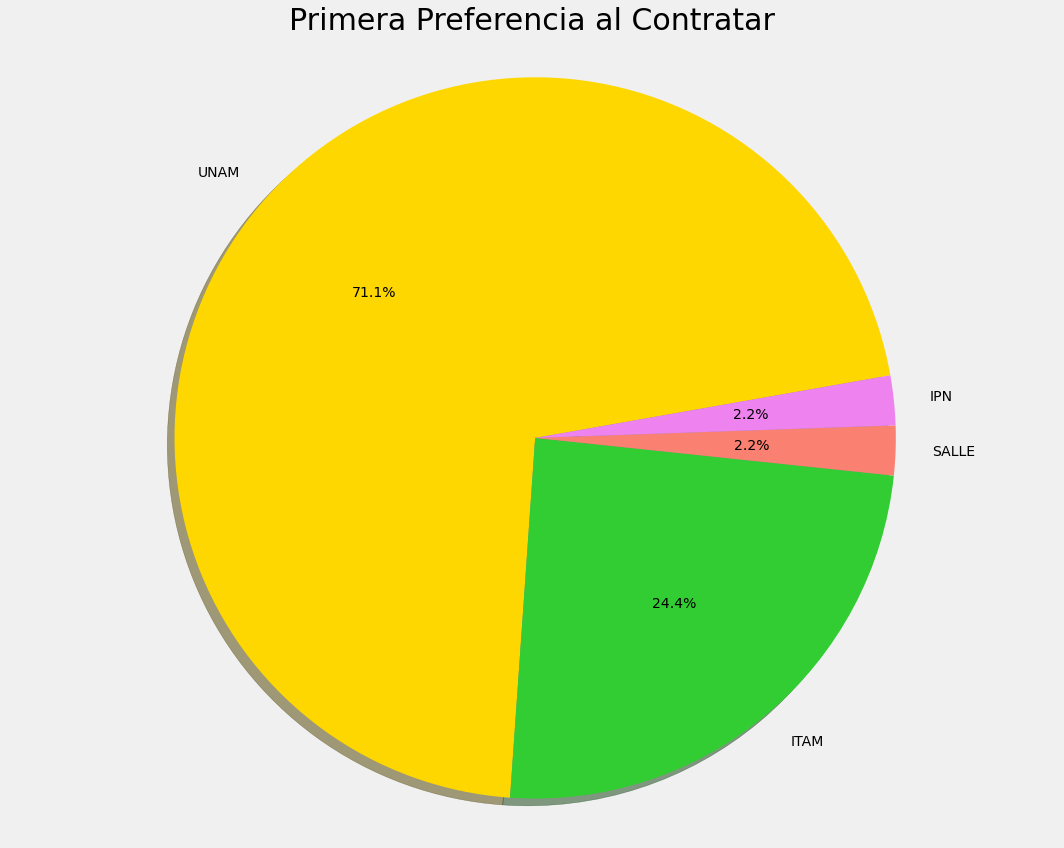

In [36]:
labels = Pref1.index
sizes = Pref1.values
plt.pie(sizes, labels=labels,autopct='%1.1f%%', colors = ["gold","limegreen","salmon","violet"] ,shadow=True, startangle=10,textprops={'fontsize': 14, "color": "black"})
plt.title("Primera Preferencia al Contratar", size = 30)

plt.axis('equal')
plt.tight_layout()
# plt.savefig("8primpref",bbox_inches = "tight", pad_inches = 0)
plt.show()

In [37]:
Pref2 = pd.Series([x for x in pref["INST2"].dropna().replace("POLITÉCNICO","IPN").replace("TEC MONTERREY","TEC").replace(r"(UNAM - UNAM|FES ACATLAN|FACULTAD DE CIENCIAS UNAM|UNAM \(MÁS PRÁCTICOS\)|CIENCIAS)","UNAM",regex = True).replace("LA SALLE","SALLE") if len(x) < 7]).value_counts()

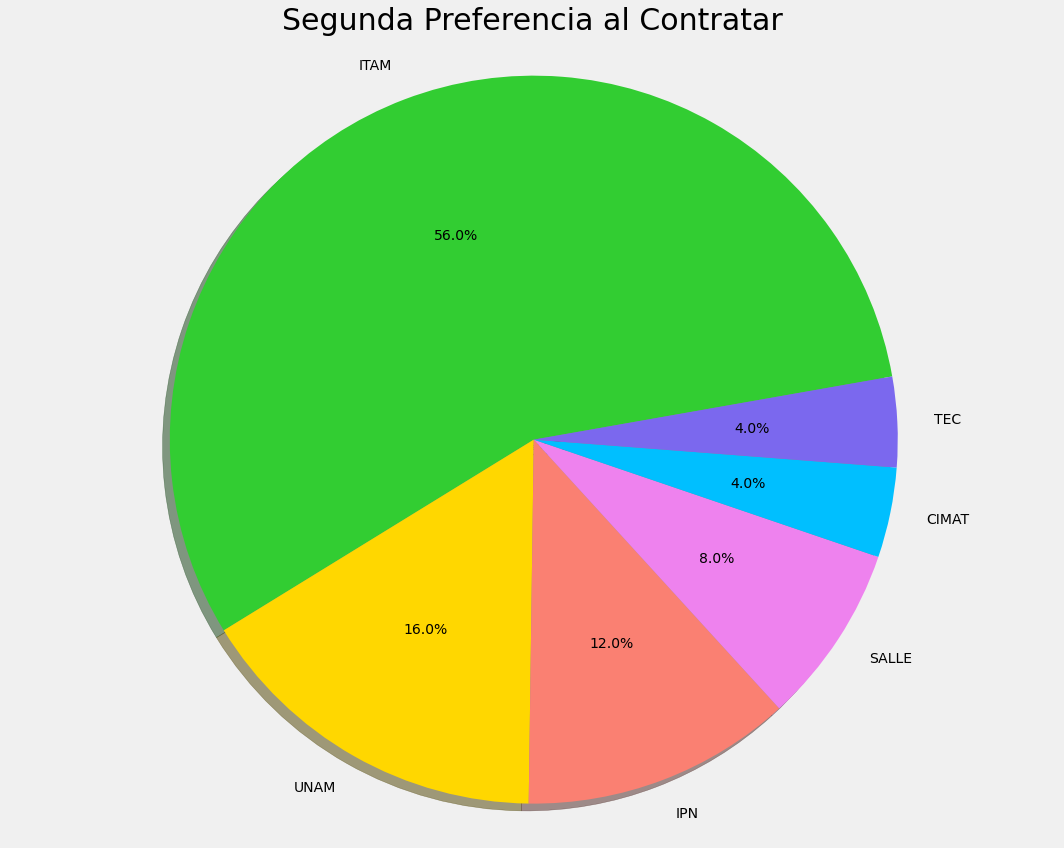

In [38]:
labels = Pref2.index
sizes = Pref2.values
plt.pie(sizes, labels=labels,autopct='%1.1f%%', colors = ["limegreen","gold","salmon","violet","deepskyblue","mediumslateblue"] ,shadow=True, startangle=10,textprops={'fontsize': 14, "color": "black"})
plt.title("Segunda Preferencia al Contratar", size = 30)

plt.axis('equal')
plt.tight_layout()
# plt.savefig("9segunpref",bbox_inches = "tight", pad_inches = 0)
plt.show()

## Características en la personalidad

In [39]:
for col in df[["COMU","EQUI","LIDER","CREA","PPER","TRAP"]].columns:
    print(df[col].value_counts())

5    138
4    109
3     28
2      6
1      1
Name: COMU, dtype: int64
5    185
4     75
3     20
2      1
1      1
Name: EQUI, dtype: int64
4    126
3     74
5     65
2     15
1      2
Name: LIDER, dtype: int64
5    160
4     85
3     30
2      7
Name: CREA, dtype: int64
4    103
5     91
3     69
2     13
1      6
Name: PPER, dtype: int64
5    179
4     70
3     27
2      4
1      2
Name: TRAP, dtype: int64


## Conocimientos Especializados para Área

In [28]:
conocimientos = df.loc[:,"COMP":"OTRO2"]

In [29]:
conocimientos.isna().sum()

COMP        0
DEMO        0
RIES        0
ECONO       0
FINAN       0
IEST        0
PROBA       0
IDEO        0
MER         0
MODMAT      0
ST          0
MENC        0
PENS        0
DANIO       0
SPER        0
SISD        0
OTR_1     254
OTRO1     119
OTR_2     273
OTRO2     130
dtype: int64

In [30]:
pd.concat([conocimientos[["OTR_1","OTRO1"]].dropna(subset = ["OTR_1"]), conocimientos[["OTR_2","OTRO2"]].dropna(subset = ["OTR_2"]).rename(columns = {"OTR_2":"OTR_1","OTRO2":"OTRO1"})]).OTR_1.value_counts()

CONTABILIDAD                       6
PROGRAMACIÓN                       4
SEGURIDAD SOCIAL                   3
RESERVAS                           2
NO VIDA                            1
FISCALDAD                          1
TEMAS REGULATORIOS                 1
LISF Y CUSF                        1
PRODUCTOS FINANCIEROS DERIVADOS    1
FIANZAS                            1
ANALISIS MULTIVARIADO              1
NORMATIVA DE SEGUROS               1
BASE DE DATOS                      1
MODELOS DE CLASIFICACION           1
MANEJO DE BASES DE DATOS           1
PROCESO DE CRÉDITO                 1
ESCRITURA TEXTO CIENTIFICO         1
BASILIA                            1
LEGISLACIÓN TRIBUTARIA             1
PROGRAMACION                       1
REASEGURO                          1
GESTION DE PROYECTOS               1
VALUACIÓN FINANCIERA               1
MACROS EN EXCEL                    1
CALCULO ESTOCASTICO                1
NORMATIVA APLICABLE A SEGUROS      1
Name: OTR_1, dtype: int64

In [31]:
conocimientos2 = conocimientos.drop(columns = ["OTR_1","OTRO1","OTR_2","OTRO2"]).replace({2: "Básicos",1: "No requeridos",3: "Avanzados"})
conocimientos2

,COMP,DEMO,RIES,ECONO,FINAN,IEST,PROBA,IDEO,MER,MODMAT,ST,MENC,PENS,DANIO,SPER,SISD
0,Básicos,No requeridos,Básicos,Básicos,Básicos,Básicos,Básicos,Básicos,No requeridos,Básicos,No requeridos,No requeridos,No requeridos,No requeridos,No requeridos,Básicos
1,Básicos,No requeridos,Básicos,No requeridos,Básicos,Básicos,Básicos,Básicos,Básicos,Básicos,Básicos,Básicos,Básicos,Básicos,Básicos,Básicos
2,Avanzados,Básicos,Básicos,Básicos,Básicos,Avanzados,Avanzados,Avanzados,Básicos,Avanzados,Avanzados,Básicos,Básicos,Avanzados,Básicos,Básicos
3,Avanzados,No requeridos,Básicos,Básicos,Básicos,No requeridos,No requeridos,Básicos,No requeridos,Básicos,No requeridos,No requeridos,No requeridos,No requeridos,No requeridos,No requeridos
4,Básicos,Básicos,Básicos,No requeridos,Básicos,No requeridos,No requeridos,No requeridos,No requeridos,Básicos,Básicos,No requeridos,No requeridos,Básicos,Básicos,No requeridos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Avanzados,No requeridos,Avanzados,Básicos,Avanzados,Básicos,No requeridos,Básicos,Avanzados,Básicos,Básicos,Básicos,No requeridos,No requeridos,No requeridos,No requeridos
278,Avanzados,No requeridos,No requeridos,Avanzados,Básicos,Básicos,No requeridos,Avanzados,No requeridos,Avanzados,No requeridos,No requeridos,No requeridos,No requeridos,No requeridos,No requeridos
279,Avanzados,No requeridos,No requeridos,No requeridos,No requeridos,Básicos,No requeridos,No requeridos,No requeridos,Básicos,No requeridos,Básicos,No requeridos,No requeridos,No requeridos,No requeridos
280,Avanzados,Básicos,No requeridos,No requeridos,Básicos,Avanzados,No requeridos,Básicos,Avanzados,No requeridos,No requeridos,Avanzados,No requeridos,No requeridos,No requeridos,No requeridos


In [33]:
conocimientos3 = conocimientos2.melt(var_name='columns', value_name='index').rename(columns = {"columns":"Materias","index":"Nivel"})

conocimientos3
cono_cru_materias = pd.crosstab(index= conocimientos3["Nivel"], columns=conocimientos3["Materias"]).drop(0)

In [35]:
cono_cru_materias = cono_cru_materias.style.background_gradient(axis = 1)

In [36]:
# dfi.export(cono_cru_materias, "cono_cru_materias.png")

### Requeridos Conocimientos

In [38]:
req_con = df[["PROG","DISE","RED","MBD"]].replace({"1": "Básico","2": "Medio","3": "Avanzado"}).melt(var_name='columns', value_name='index').rename(columns = {"columns":"Habilidades","index":"Nivel"})


cono_cru_materias2 = pd.crosstab(index= req_con["Nivel"], columns=req_con["Habilidades"]).drop("0").style.background_gradient(axis = 1)

In [39]:
# dfi.export(cono_cru_materias2, "cono_cru_materias2.png")

# Análisis en Conjuto (CrossTables)

Estratificar por `Actividad Principal de la institución.`

1. API - SECTOR - EXPERIENCIA

2. API - CARRERAS AFINES

3. API - MEDIOS DE CONTRATACION

4. API - ADMISIÓN A PRIMER INGRESO

5. API - HORARIOS PARA ESTUDIANTES

6. API - PROMEDIO

7. API - INGLES

8. API - EXPERIENCIA Y AÑOS

9. API - PREFERENCIA POR ESCUELA

10. API - CARACTERISTICAS DESEABLES

11. API - TRABAJO TECNICO MATERIAS

12. API - LENGUAJES DE PROGRAMACION

Ademas analizar textos:

14. DEFICIENCIAS




In [46]:
conjunto = df.copy()

## API limpieza

Comenzaré por limpiar la columna de API para que sea el medio por la cual estratificaré la muestra

In [47]:
conjunto[conjunto['ACTP'].str.count('CUANTITATIVOS')>0]

,EMPRESA,PUESTO,ACTP,SECTOR,FUN1,FUN2,FUN3,CAR1,CAR2,CAR3,PERIODICO,INTERNET,EMP,BOLSA,RECOM,EDAD,EDAD2,GENERO,GENERO2,VIAJA,EST,PASAN,LIC,POS,HORAEST,PROM,PROM2,DOMINIO,IT,ILE,IH,FT,FLE,OTRO,OLE,OH,EXP,EXPA,CARTA,EXAMED,EXAPSI,EXATEC,PREFE,INST1,INST2,INST3,COMU,EQUI,LIDER,CREA,PPER,TRAP,COMP,DEMO,RIES,ECONO,FINAN,IEST,PROBA,IDEO,MER,MODMAT,ST,MENC,PENS,DANIO,SPER,SISD,OTR_1,OTRO1,OTR_2,OTRO2,OFF,PAQUE,PAQ1,PAQ2,LENG,LENG1,LENG2,LENG3,PROG,DISE,RED,MBD,TECEXP,CII,MT,CTO,DEFI_1,DEFI_2,DEFI_3,DEFI_4,CURTEC,CURIDEO,DIPMA,ESTPUES,OBS
250,GRUPO FINANCIERO SCOTIABANK SA DE CV,DIR ADJ MODELOS CUANTITATIVOS,REVISIÓN Y AUTORIZACIÓN INTERNA DE MODELOS CUA...,2,AUDITORIA REVISION DE MODELOS,APROBACION DE MODELOS,SUGERENCIAS MEJORAS,ING EN COMPUTACION,ING FINANCIERA,MATEMATICAS APLICADAS,NaN,NaN,X,NaN,NaN,S,35,N,NaN,S,NaN,NaN,X,NaN,S,N,NaN,S,X,X,X,NaN,NaN,NaN,NaN,NaN,S,2,S,S,S,S,S,ITAM,TEC MONTERREY,NaN,4,5,4,4,4,5,3,1,3,3,3,3,3,2,1,1,2,2,1,1,1,1,NaN,NaN,NaN,NaN,S,S,SPSS,SAS,S,JAVA,VBA,NaN,2,2,1,2,S,S,S,N,TRABAJO EN EQUIPO,DOMINIO DE IDIOMAS,HABILIDADES SOCIALES,REGULACION EN DERECHO APLICABLE,S,N,N,S,SE REQUIEREN PROFESIONISTAS QUE CONOZCAN RECOM...


##### Corrección "ASEGURADORA"

In [48]:
conjunto.iloc[conjunto[conjunto['ACTP'].str.count('(^A?SEGU.*|ASEGURADO[R]|SEGUR[OP]S?|ASEGURADOS?|ACTUARIA.*|RRC|P[ÓO]LIZAS?|SUSCRIPCIÓN|TECNICAS|PENSIONES|RETIRO|PENSI[OÓ]N|DINERO)')>0]["ACTP"].index,2] = "ASEGURADORA"

conjunto.iloc[conjunto[conjunto['ACTP'].str.count('COMISIÓN NACIONAL DE SEGUROS Y FIANZAS')>0]["ACTP"].index,2] = "ASEGURADORA"

##### Corrección "CONSULTORIA"

In [49]:
conjunto.iloc[conjunto[conjunto['ACTP'].str.count('^CONSUL.*')>0]["ACTP"].index,2] = "CONSULTORIA"

conjunto.iloc[conjunto[conjunto['ACTP'].str.count('(INVESTIGACI[OÓ]N|MERCADO)')>0]["ACTP"].index,2] = "CONSULTORIA"

##### Corrección "BANCO"

In [50]:
conjunto.iloc[conjunto[conjunto['ACTP'].str.count('(BANC.*|RIESGOS?|CR[EÉ]DITO|REGULAR|MONEDA|CUANTITATIVOS)')>0]["ACTP"].index,2] = "BANCO"

##### Corrección "PRODUCTOS / SERVICIOS FINANCIEROS"

In [51]:
conjunto.iloc[conjunto[conjunto['ACTP'].str.count('(FINANCIER[AO]S?|INVERSIONES|INVERSION|CARTERA|FINANCIAMIENTO|PR[EÉ]STAMOS?|MANTENIMIENTO)')>0]["ACTP"].index,2] = "PRODUCTOS / SERVICIOS FINANCIEROS"

##### Corrección "ANÁLISIS"

In [52]:
conjunto.iloc[conjunto[conjunto['ACTP'].str.count('(AN[AÁ]LI.*|DATOS|ESTAD[IÍ]STIC[AO]S?|DATA)')>0]["ACTP"].index,2] = "ANÁLISIS"

Corrección "FARMACEUTICA"

In [53]:
conjunto.iloc[conjunto[conjunto['ACTP'].str.count('(FARMA|FRAMA)')>0]["ACTP"].index,2] = "FARMACEUTICA"

Corrección "ALIMENTOS"

In [54]:
conjunto.iloc[conjunto[conjunto['ACTP'].str.count('(ALIMENTOS)')>0]["ACTP"].index,2] = "PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS"

Correción "RH"

In [55]:
conjunto.iloc[conjunto[conjunto['ACTP'].str.count('(RH|RECLUTAMIENTO|HUMANOS|PERSONAL)')>0]["ACTP"].index,2] = "RH"

Corrección "DOCENCIA"

In [56]:
conjunto.iloc[conjunto[conjunto['ACTP'].str.count('(EDUCACION|EXAMENES|CLASES?|CURSOS|DOCENCIA|PROFESOR|EDUCATIVA)')>0]["ACTP"].index,2] = "DOCENCIA"

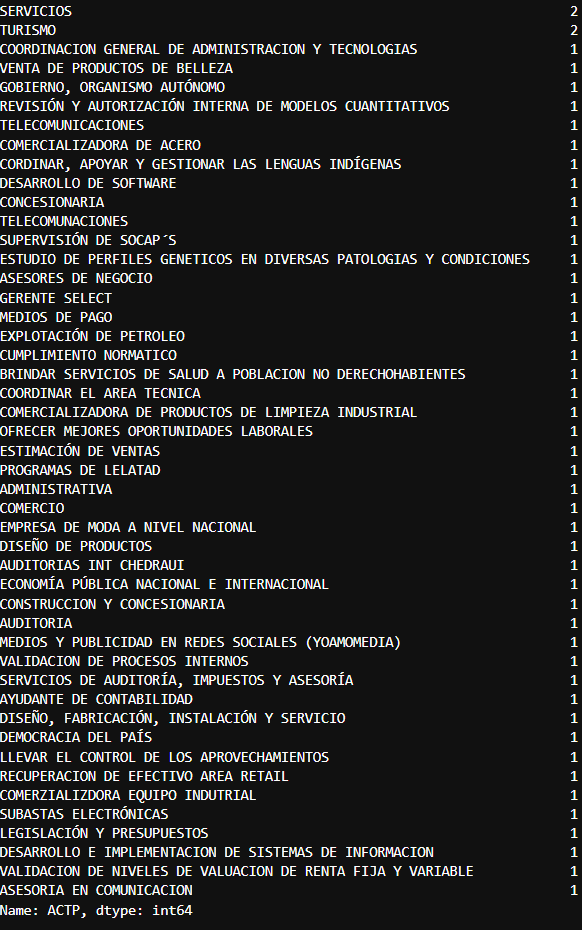

In [57]:
estratos = conjunto[conjunto['ACTP'].str.count('(ASEGURADORA|CONSULTORIA|BANCO|PRODUCTOS / SERVICIOS FINANCIEROS|ANÁLISIS|FARMACEUTICA|PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS|RH|DOCENCIA)')>0].rename(columns = {"ACTP":"Actividad"})

## DISTRIBUCION POR SECTOR

In [58]:
estratos.Actividad.value_counts()

ASEGURADORA                               74
BANCO                                     56
PRODUCTOS / SERVICIOS FINANCIEROS         44
CONSULTORIA                               24
ANÁLISIS                                  11
DOCENCIA                                  10
FARMACEUTICA                               6
PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS     5
RH                                         4
Name: Actividad, dtype: int64

## API - SECTO - EXPA

In [59]:
api_sec_expa = estratos[["Actividad","SECTOR","EXPA"]]
api_sec_expa.SECTOR.replace({1:"Público",2:"Privado"}, inplace = True)

In [60]:
api_sec_expa

,Actividad,SECTOR,EXPA
0,BANCO,Público,0
1,BANCO,Público,0
2,ASEGURADORA,Privado,0
3,BANCO,Público,0
4,ASEGURADORA,Privado,0
...,...,...,...
275,BANCO,Privado,0
277,FARMACEUTICA,Privado,0
279,CONSULTORIA,Privado,0
280,CONSULTORIA,Privado,0


In [61]:
cru1_api_sec_expa = round(api_sec_expa.groupby(["Actividad","SECTOR"]).agg({"EXPA":["count","mean","median"]}).rename(columns = {"count":"n","mean":"Media","median":"Mediana"}),2)
                                                                                                           
cru1_api_sec_expa.columns.set_levels(['Experiencia (años) para primer trabajo'],level=0,inplace=True)


In [62]:
# dfi.export(cru1_api_sec_expa, "cru1_api_sec_expa1.png")

In [63]:
graf_cru1_api_sec_expa = cru1_api_sec_expa.unstack(0).drop(columns = ["n","Media"], level = 1)

In [64]:
graf_cru1_api_sec_expa.columns = graf_cru1_api_sec_expa.columns.droplevel(0).droplevel(0)

In [65]:
graf_cru1_api_sec_expa = graf_cru1_api_sec_expa.stack().reset_index()

In [66]:
graf_cru1_api_sec_expa

,SECTOR,Actividad,0
0,Privado,ANÁLISIS,0.0
1,Privado,ASEGURADORA,0.0
2,Privado,BANCO,0.0
3,Privado,CONSULTORIA,0.0
4,Privado,DOCENCIA,0.0
5,Privado,FARMACEUTICA,0.0
6,Privado,PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS,1.0
7,Privado,PRODUCTOS / SERVICIOS FINANCIEROS,0.0
8,Privado,RH,0.0
9,Público,ANÁLISIS,0.0


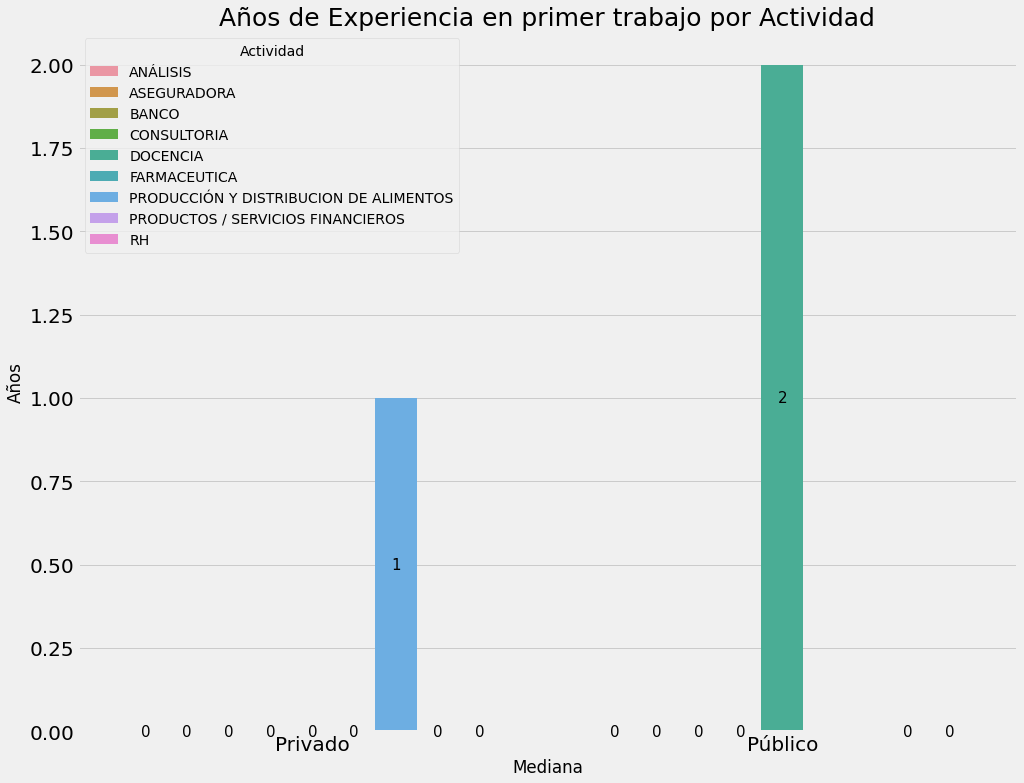

In [67]:
ax = sns.barplot(x = "SECTOR",hue = "Actividad", y = 0, data = graf_cru1_api_sec_expa)

for container in ax.containers:
    ax.bar_label(container, size = 15, label_type = "center")

plt.title("Años de Experiencia en primer trabajo por Actividad", fontsize = 25)
plt.ylabel("Años")
plt.xlabel("Mediana")
plt.xticks(size = 20)
plt.yticks(size = 20)

# plt.savefig("graf_cru1_api_sec_expa_imagen",bbox_inches = "tight", pad_inches = 0)

plt.show()

## API - CARRERAS AFINES

In [68]:
api_ca = estratos[["Actividad", "CAR1","CAR2","CAR3"]]

In [69]:
api_ca = api_ca.set_index("Actividad").stack().reset_index().drop(columns = "level_1").rename(columns = {0:"Carreras"})

In [70]:
api_ca["Carreras"] = api_ca["Carreras"].replace(r"(ESTADISTICA|ACTUARIOS|ACTUARÍA,)","ACTUARIA",regex = True).replace(r"(ING[.]|INGENIERIAS|INGENIEIRA|INGENERIA|INGIENERIAS)","INGENIERIA",regex = True).replace(r"ING$","INGENIERIA", regex = True).replace(r"INGENIERI?O[Ss]?","INGENIERIA",regex = True).replace("INGENIERÍA","INGENIERIA").replace(r"(CONTADURÍA|CONTADORES)","CONTADURIA", regex = True).replace(r"(MATEMATICAS APLICADAS|MAC)","MATEMATICAS",regex = True).replace(r"(FIANANZAS|FINANCIEROS|FINANZAS,)","FINANZAS", regex = True).replace("CONTABILIDAD","CONTADURIA").replace(r"ADM.*","ADMINISTRACIÓN", regex = True).replace(r"(M[EA]TEM[ÁA]TIC[AO]S?|MATEMTICAS)","MATEMATICAS",regex = True).replace(r"(^COMPUTACION$|PROGRAMACION|INFORMATICOS|PROGRAMADORES|COMPUTACIONALES|SISTEMAS)","INFORMATICA",regex = True).replace("ABOGADOS,","ABOGADO").replace("ACTUARÍA-MATEMATICAS","ACTUARIA").replace("ESTADÍSTICA-COMPUTACIONALES","ACTUARIA").replace(r"(PSCIOLOGIA|PSICOLOGÍA)","PSICOLOGIA",regex = True).replace("FISICOS","FISICA").replace(r"(QUIMICAS|QUIMIO|QFB)","QUIMICA",regex = True).replace(r"(PEDAGODÍA|PEDAGOGOS)","PEDAGOGIA",regex = True).replace(r"(MÉDICOS,|MEDICINA,)","MEDICINA",regex = True).replace("SOCIOLOGOS","SOCIOLOGIA").apply(lambda x: x.split()[0])

In [71]:
api_ca = api_ca.drop(api_ca[(api_ca.Carreras == "LICENCIATURA") | (api_ca.Carreras == "LICENCIADO") | (api_ca.Carreras == "NINGUNA") | (api_ca.Carreras == "TODOS") | (api_ca.Carreras == "CIENCIAS") | (api_ca.Carreras == "PROGRMATEMATICASION") | (api_ca.Carreras == "TRABAJO") | (api_ca.Carreras == "ECONONICO-") | (api_ca.Carreras == "AUDITORIA") ].index)

In [72]:
api_ca

,Actividad,Carreras
0,BANCO,ACTUARIA
1,BANCO,CONTADURIA
2,BANCO,ECONOMIA
3,BANCO,ADMINISTRACIÓN
4,BANCO,ACTUARIA
...,...,...
612,CONSULTORIA,ADMINISTRACIÓN
613,CONSULTORIA,MERCADOTECNIA
614,CONSULTORIA,ACTUARIA
615,CONSULTORIA,ECONOMIA


In [73]:
cru2_api_ca = api_ca.groupby(["Actividad","Carreras"])[["Carreras"]].count()

In [74]:
cru2_api_ca

Carreras
Actividad Carreras                
ANÁLISIS  ACTUARIA               9
          ADMINISTRACIÓN         1
          DERECHO                1
          ECONOMIA               4
          FISICA                 1
...                            ...
RH        ECONOMIA               1
          INGENIERIA             2
          MATEMATICAS            1
          PEDAGOGIA              2
          PSICOLOGIA             1

[100 rows x 1 columns]

In [75]:
graf_cru2_api_ca = cru2_api_ca.stack().reset_index().drop(columns = "level_2")

In [76]:
graf_cru2_api_ca

,Actividad,Carreras,0
0,ANÁLISIS,ACTUARIA,9
1,ANÁLISIS,ADMINISTRACIÓN,1
2,ANÁLISIS,DERECHO,1
3,ANÁLISIS,ECONOMIA,4
4,ANÁLISIS,FISICA,1
...,...,...,...
95,RH,ECONOMIA,1
96,RH,INGENIERIA,2
97,RH,MATEMATICAS,1
98,RH,PEDAGOGIA,2


##### Primera grafica por carreras

In [77]:
Primera_graf_cru2_api_ca = graf_cru2_api_ca.head(47).rename(columns = {0:"n"})

In [78]:
Primera_graf_cru2_api_ca_ = Primera_graf_cru2_api_ca.groupby(["Actividad","Carreras"])[["n"]].sum()

In [79]:
Primera_graf_cru2_api_ca_
# dfi.export(Primera_graf_cru2_api_ca, "Primera_graf_cru2_api_ca.png")

n
Actividad   Carreras                
ANÁLISIS    ACTUARIA               9
            ADMINISTRACIÓN         1
            DERECHO                1
            ECONOMIA               4
            FISICA                 1
            INFORMATICA            1
            INGENIERIA             2
            MATEMATICAS            5
            MEDICINA               1
            POLITICAS              1
ASEGURADORA ABOGADOS,              1
            ACTUARIA              49
            ADMINISTRACIÓN        18
            CONTADURIA            14
            DEMOGRAFIA             1
            DERECHO                4
            ECONOMIA              26
            FINANZAS               6
            FISICA                 1
            INFORMATICA            2
            ING                    2
            INGENIERIA             7
            INGENIERÍA             1
            MATEMATICAS           26
            MEDICINA               2
            PROGRAMATEMATICASION   1
BANCO       ACTUARIA              43
            ADMINISTRACIÓN         7
            ARQUITECOS             1
            CONTADURIA            11
            ECONOMIA              28
            FINANZAS              15
            FISICA                 1
            INFORMATICA            4
            ING                    2
            INGENIERIA            12
            INGENIERÍA             3
            MATEMATICAS           30
            MERCADOTECNIA          1
CONSULTORIA ACTUARIA              17
            ADMINISTRACIÓN         6
            CONTADURIA             1
            DERECHO                1
            ECONOMIA               6
            FINANZAS               2
            FISICOS                1
            INGENIERIA            11

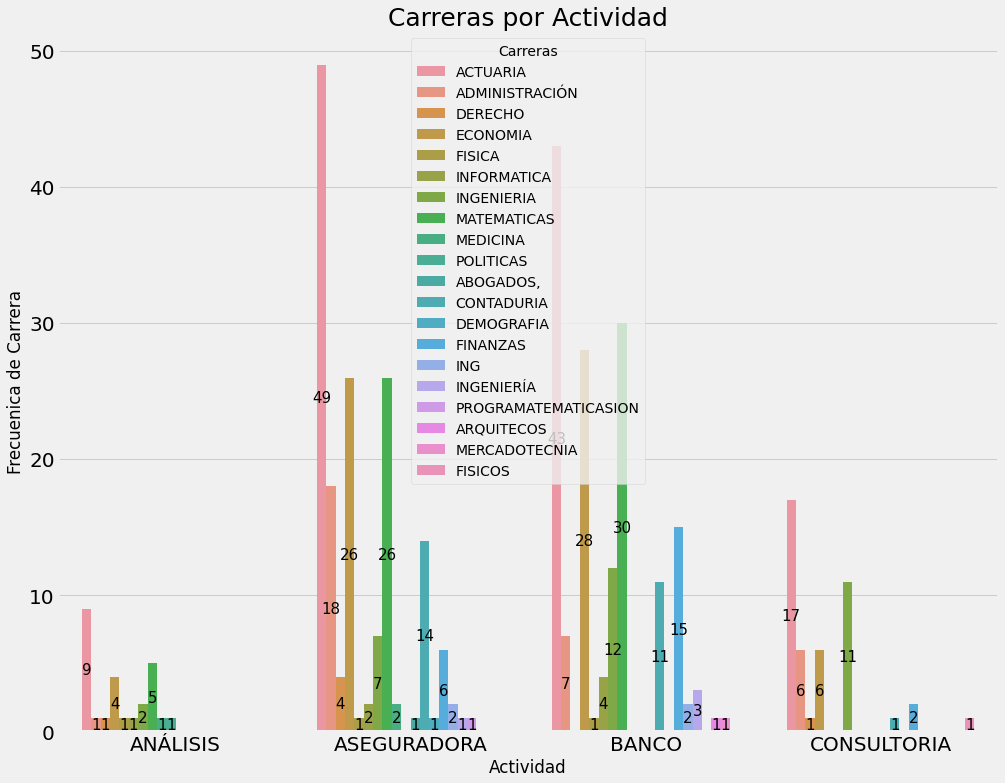

In [80]:
ax = sns.barplot(x = "Actividad",hue = "Carreras", y = "n", data = Primera_graf_cru2_api_ca)

for container in ax.containers:
    ax.bar_label(container, size = 15, label_type = "center")

plt.title("Carreras por Actividad", fontsize = 25)
plt.ylabel("Frecuenica de Carrera")
plt.xlabel("Actividad")
plt.xticks(size = 20)
plt.yticks(size = 20)

# plt.savefig("graf_Primera_graf_cru2_api_ca",bbox_inches = "tight", pad_inches = 0)

plt.show()

##### Segunda grafica por carreras

In [81]:
Segunda_graf_cru2_api_ca = graf_cru2_api_ca.tail(43).rename(columns = {0:"n"}).replace({"PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS":"PROD. DIST. ALIMEN", "PRODUCTOS / SERVICIOS FINANCIEROS":"PROD/SERV FINAN"})

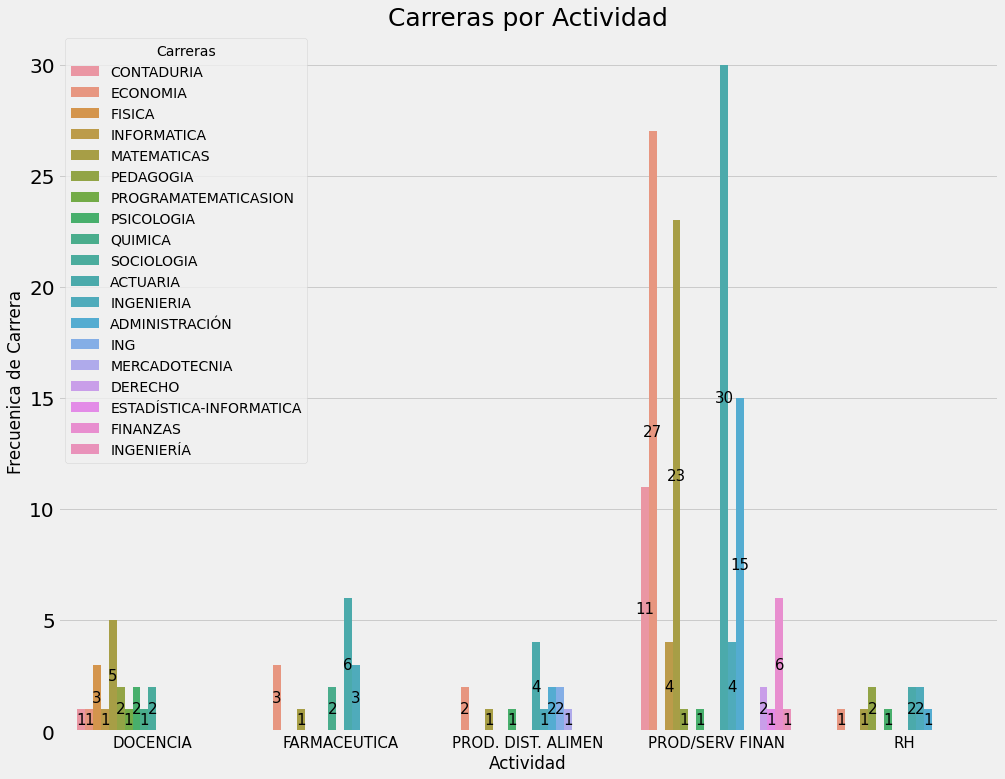

In [82]:
ax = sns.barplot(x = "Actividad",hue = "Carreras", y = "n", data = Segunda_graf_cru2_api_ca)

for container in ax.containers:
    ax.bar_label(container, size = 15, label_type = "center")

plt.title("Carreras por Actividad", fontsize = 25)
plt.ylabel("Frecuenica de Carrera")
plt.xlabel("Actividad")
plt.xticks(size = 15)
plt.yticks(size = 20)

# plt.savefig("graf_Segunda_graf_cru2_api_ca",bbox_inches = "tight", pad_inches = 0)

plt.show()

In [83]:
Segunda_graf_cru2_api_ca_ = Segunda_graf_cru2_api_ca.groupby(["Actividad","Carreras"])[["n"]].sum()

In [84]:
# dfi.export(Segunda_graf_cru2_api_ca_, "Segunda_graf_cru2_api_ca_.png")

## API - MEDIOS DE CONTRATACION

In [85]:
api_contra = estratos[["Actividad","PERIODICO","INTERNET","EMP","BOLSA","RECOM"]].fillna(0).replace("X",1)

In [86]:
api_contra

,Actividad,PERIODICO,INTERNET,EMP,BOLSA,RECOM
0,BANCO,0,1,0,0,1
1,BANCO,0,0,0,1,0
2,ASEGURADORA,0,0,1,1,1
3,BANCO,0,1,0,1,1
4,ASEGURADORA,0,1,0,1,1
...,...,...,...,...,...,...
275,BANCO,0,0,0,1,1
277,FARMACEUTICA,1,0,0,1,0
279,CONSULTORIA,0,1,1,1,1
280,CONSULTORIA,0,0,1,0,0


In [87]:
graf_api_contra = api_contra.groupby("Actividad")[["PERIODICO","INTERNET","EMP","BOLSA","RECOM"]].sum().style.background_gradient(axis = 1)

In [88]:
# dfi.export(graf_api_contra, "graf_api_contra.png")

## API - ADMISIÓN A PRIMER INGRESO

In [89]:
api_admin = estratos[["Actividad","EST","PASAN","LIC","POS"]].fillna(0).replace("X",1)

In [90]:
graf_api_admin = api_admin.groupby("Actividad")[["EST","PASAN","LIC","POS"]].sum().style.background_gradient(axis = 1)

In [91]:
# dfi.export(graf_api_admin, "graf_api_admin.png")

## API - HORARIOS PARA ESTUDIANTES

In [92]:
api_hora = estratos[["Actividad","HORAEST"]].dropna().replace({"PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS":"PROD. DIST. ALIMEN", "PRODUCTOS / SERVICIOS FINANCIEROS":"PROD/SERV FINAN"})

In [93]:
api_hora

,Actividad,HORAEST
0,BANCO,S
1,BANCO,N
2,ASEGURADORA,S
3,BANCO,S
6,ASEGURADORA,S
...,...,...
274,ASEGURADORA,S
275,BANCO,S
277,FARMACEUTICA,S
279,CONSULTORIA,N


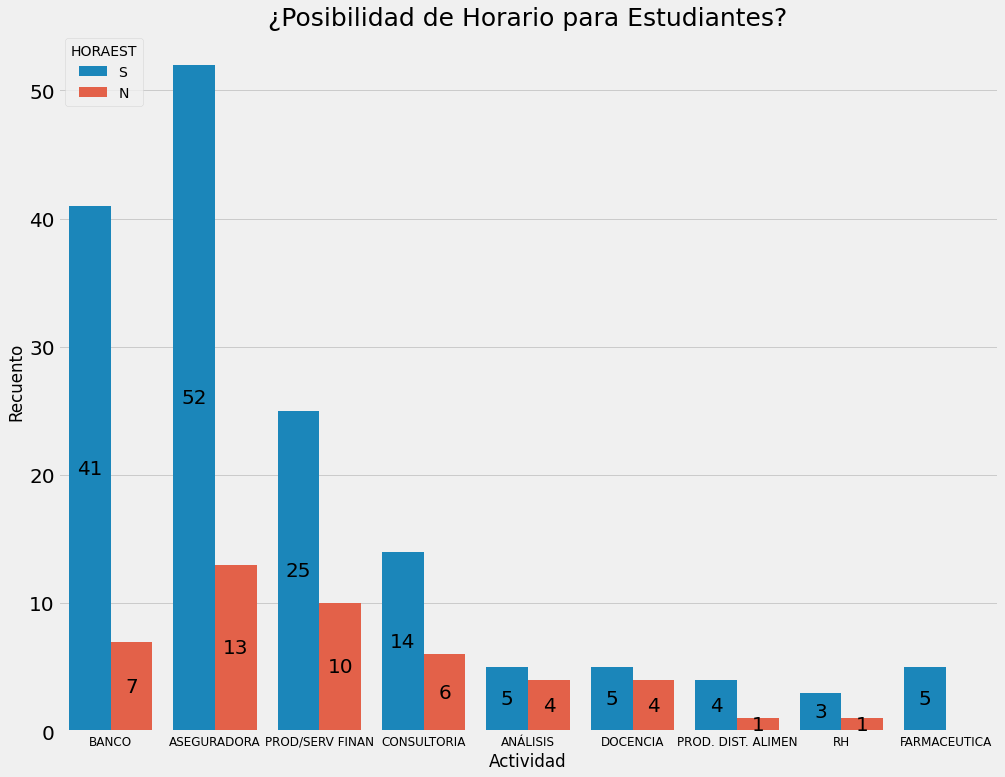

In [94]:
ax = sns.countplot(x = "Actividad",hue = "HORAEST", data = api_hora)

for container in ax.containers:
    ax.bar_label(container, size = 20, label_type = "center")

plt.title("¿Posibilidad de Horario para Estudiantes?", fontsize = 25)
plt.ylabel("Recuento")
plt.xlabel("Actividad")
plt.xticks(size = 12)
plt.yticks(size = 20)

# plt.savefig("graf_api_hora",bbox_inches = "tight", pad_inches = 0)

plt.show()

In [95]:
cru3_api_hora = api_hora.groupby(["Actividad","HORAEST"])[["HORAEST"]].count().rename(columns = {"HORAEST":"Recuento"})

In [96]:
cru3_api_hora['%'] = cru3_api_hora.groupby(level = 0).transform(lambda x: x/x.sum())

In [97]:
cru3_api_hora = cru3_api_hora.style.background_gradient(axis = 0,subset=pd.IndexSlice[:, ["%"]]).format("{:.3%}",subset=pd.IndexSlice[:, ["%"]])

In [98]:
# dfi.export(cru3_api_hora, "cru3_api_hora.png")

## API - PROMEDIO

In [99]:
api_prom = estratos[["Actividad","PROM2"]].dropna().drop(estratos[["Actividad","PROM2"]][estratos[["Actividad","PROM2"]].PROM2 == "0"].index).replace({"PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS":"PROD. DIST. ALIMEN", "PRODUCTOS / SERVICIOS FINANCIEROS":"PROD/SERV FINAN"})

api_prom["PROM2"] = api_prom["PROM2"].astype("float64") 

In [100]:
api_prom

,Actividad,PROM2
0,BANCO,8.0
6,ASEGURADORA,8.0
8,ASEGURADORA,8.0
18,ASEGURADORA,8.0
22,ASEGURADORA,8.0
...,...,...
253,PROD/SERV FINAN,8.0
254,PROD/SERV FINAN,8.5
256,PROD. DIST. ALIMEN,8.5
259,ASEGURADORA,8.5


In [101]:
cru4_api_prom = round(api_prom.groupby("Actividad")[["PROM2"]].mean().rename(columns = {"PROM2":"Promedio"}),2)

In [102]:
# dfi.export(cru4_api_prom, "cru4_api_prom.png")

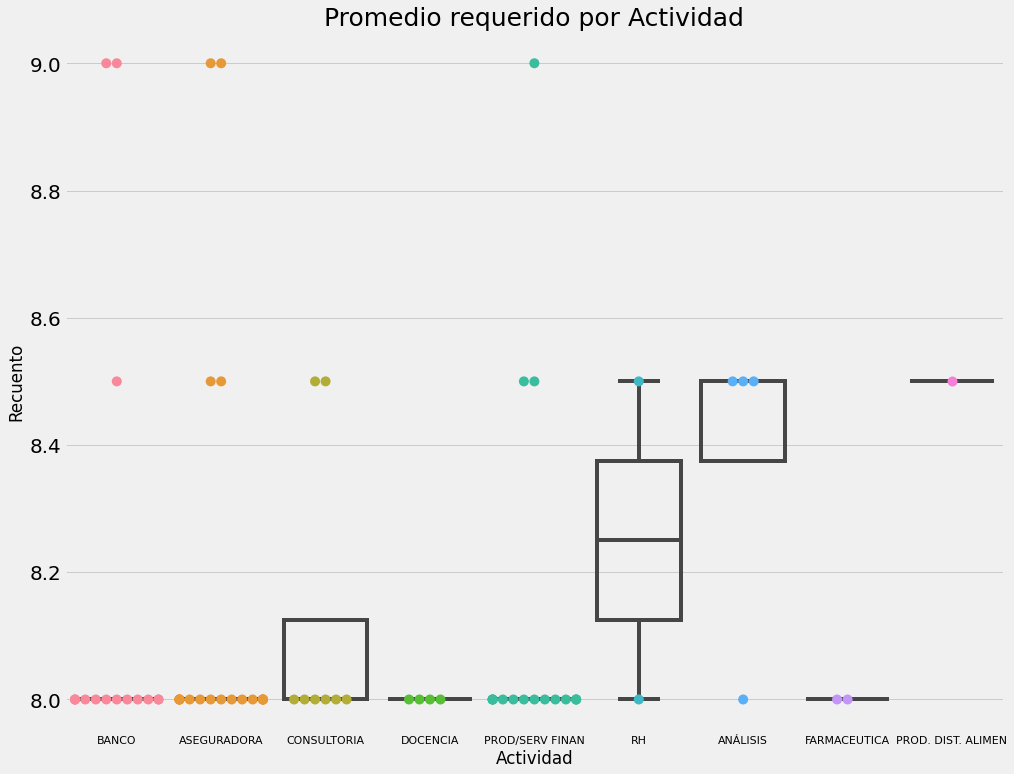

In [103]:
sns.boxplot(x = "Actividad",y = "PROM2", data=api_prom, boxprops={'facecolor':'None'})
sns.swarmplot(x = "Actividad",y = "PROM2", data= api_prom, size = 10, )

plt.title("Promedio requerido por Actividad", fontsize = 25)
plt.ylabel("Recuento")
plt.xlabel("Actividad")
plt.xticks(size = 11)
plt.yticks(size = 20)

# plt.savefig("graf_api_prom",bbox_inches = "tight", pad_inches = 0)

plt.show()

## API - INGLES

In [104]:
api_ingles = estratos[["Actividad","IT","ILE","IH"]].rename(columns = {"IT":"Traducir","ILE":"Leer y Escribir","IH":"Hablar"})

In [105]:
cru5_api_ingles = api_ingles.fillna(0).replace("X",1).groupby("Actividad")[["Traducir","Leer y Escribir","Hablar"]].sum().style.background_gradient(axis = 1)

In [106]:
# dfi.export(cru5_api_ingles, "cru5_api_ingles.png")

## API - EXPERIENCIA Y AÑOS

In [107]:
api_exp = estratos[["Actividad","EXPA"]].replace({"PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS":"PROD. DIST. ALIMEN", "PRODUCTOS / SERVICIOS FINANCIEROS":"PROD/SERV FINAN"})

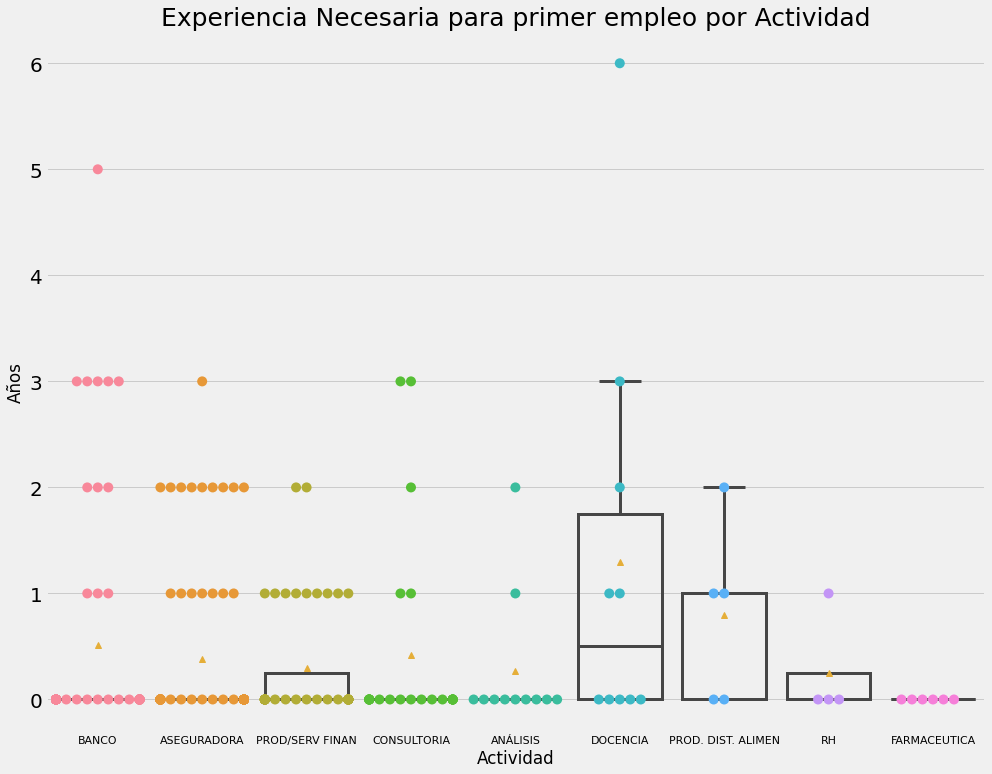

In [108]:
sns.boxplot(x = "Actividad",y = "EXPA", data=api_exp, boxprops={'facecolor':'None'},showmeans=True, linewidth = 3)
sns.swarmplot(x = "Actividad",y = "EXPA", data= api_exp, size = 10, )

plt.title("Experiencia Necesaria para primer empleo por Actividad", fontsize = 25)
plt.ylabel("Años")
plt.xlabel("Actividad")
plt.xticks(size = 11)
plt.yticks(size = 20)

# plt.savefig("graf_api_exp",bbox_inches = "tight", pad_inches = 0)

plt.show()

## API - PREFERENCIA POR ESCUELA

In [109]:
api_pref = estratos[["Actividad","INST1","INST2","INST3"]].dropna(subset = ["INST1","INST2","INST3"], how = "all").set_index("Actividad").stack().reset_index().drop(columns = "level_1").rename(columns = {0:"Universidades"}).replace({"PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS":"PROD. DIST. ALIMEN", "PRODUCTOS / SERVICIOS FINANCIEROS":"PROD/SERV FINAN"})

In [110]:
api_pref = api_pref.drop(api_pref[(api_pref.Universidades == "DOMINIO MATE") | (api_pref.Universidades == "CAPACIDAD ANALISIS") | (api_pref.Universidades == "SE CONTRATAN MATEMÁTICOS QUE SEPAN PROGRAMAR") | (api_pref.Universidades == "DEPENDE DEL ÁREA")].index).replace(r"(FACULTAD DE CIENCIAS UNAM|UNAM - IIMAS|FES ACATLAN|UNAM \(MÁS PRÁCTICOS\)|UNAM - FES ACATLAN|CIENCIAS)","UNAM",regex = True).replace(r"(UNIVERSIDAD LA SALLE|LA SALLE)","SALLE", regex = True).replace(r"(TEC MONTERREY|ITESM)","TEC",regex = True).replace("POLITÉCNICO","IPN").replace("UNIVERSIDAD MARISTA","MARISTA")

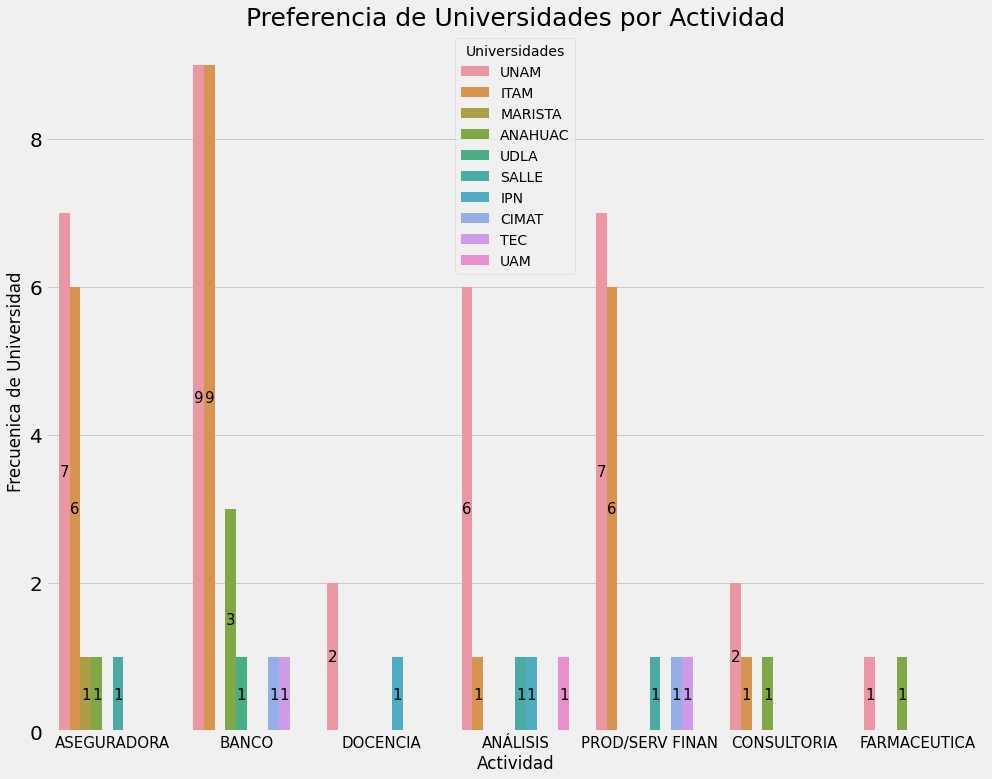

In [111]:
ax = sns.countplot(x = "Actividad",hue = "Universidades", data = api_pref)

for container in ax.containers:
    ax.bar_label(container, size = 15, label_type = "center")

plt.title("Preferencia de Universidades por Actividad", fontsize = 25)
plt.ylabel("Frecuenica de Universidad")
plt.xlabel("Actividad")
plt.xticks(size = 15)
plt.yticks(size = 20)

# plt.savefig("graf_api_pref",bbox_inches = "tight", pad_inches = 0)

plt.show()

In [112]:
cruz6_api_pref = round(pd.crosstab(index = api_pref.Actividad ,columns = api_pref.Universidades,margins = True, normalize = True),2).style.background_gradient(axis = 1,subset=pd.IndexSlice["ANÁLISIS":"PROD/SERV FINAN", "ANAHUAC":"UNAM"]).format("{:.2%}")

In [113]:
# dfi.export(cruz6_api_pref, "cruz6_api_pref.png")

## API - CARACTERISTICAS DESEABLES

In [532]:
api_carac = estratos[["Actividad","COMU","EQUI","LIDER","CREA","PPER","TRAP"]].replace({"PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS":"PROD. DIST. ALIMEN", "PRODUCTOS / SERVICIOS FINANCIEROS":"PROD/SERV FINAN"})

In [533]:
api_carac = api_carac.set_index("Actividad").stack().reset_index().rename(columns = {"level_1":"Característica",0:"Preferencia"})

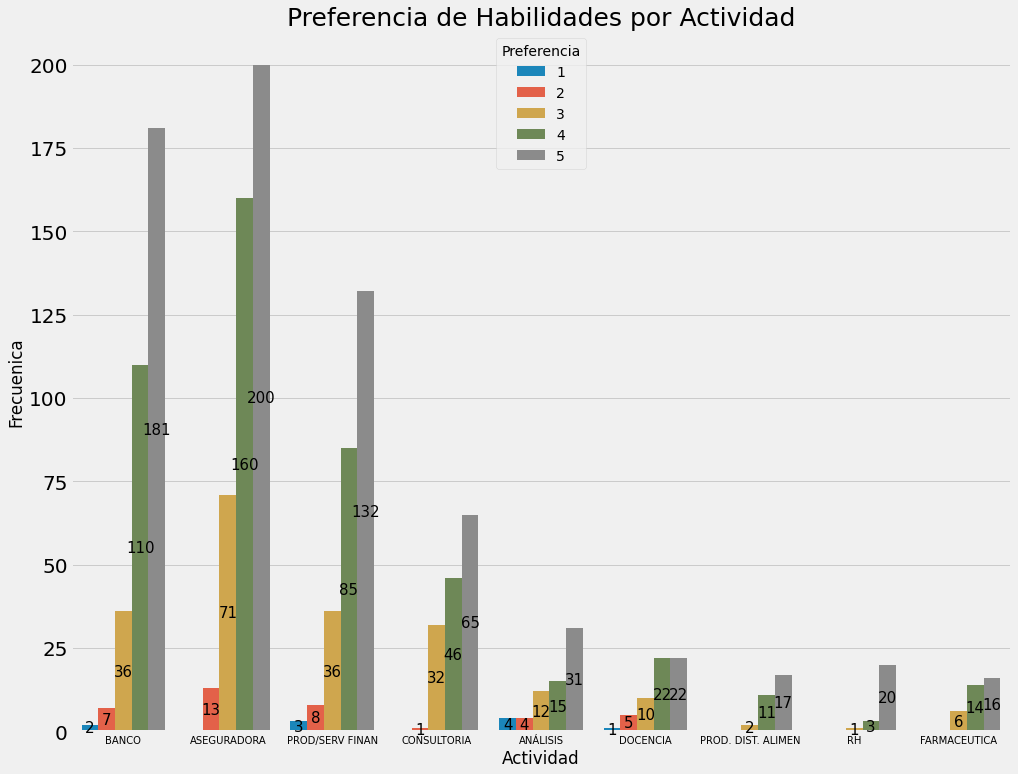

In [537]:
ax = sns.countplot(x = "Actividad",hue = "Preferencia", data = api_carac)

for container in ax.containers:
    ax.bar_label(container, size = 15, label_type = "center")

plt.title("Preferencia de Habilidades por Actividad", fontsize = 25)
plt.ylabel("Frecuenica")
plt.xlabel("Actividad")
plt.xticks(size = 10)
plt.yticks(size = 20)

# plt.savefig("graf_api_carac",bbox_inches = "tight", pad_inches = 0)

plt.show()

## API - CONOCIMIENTO TÉCNICO MATERIAS

In [523]:
api_materias = pd.concat([estratos["Actividad"],estratos.loc[:,"COMP":"SISD"]], axis = 1).replace({1:"No requeridos",2: "Básicos",3:"Avanzados",0:np.nan}).replace({"PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS":"PROD. DIST. ALIMEN", "PRODUCTOS / SERVICIOS FINANCIEROS":"PROD/SERV FINAN"})

api_materias = api_materias.set_index("Actividad").stack().reset_index().rename(columns = {0:"Conocimientos","level_1":"Nivel"})

cruz8_api_materias = api_materias.groupby(["Actividad","Nivel","Conocimientos"])[["Conocimientos"]].count()

cruz8_api_materias = cruz8_api_materias.loc[["ASEGURADORA","BANCO","PROD/SERV FINAN"],:].rename(columns = {"Conocimientos":"n"})

In [524]:
cruz8_api_materias = cruz8_api_materias.unstack().style.background_gradient(axis = 0).set_precision(0)

In [526]:
# dfi.export(cruz8_api_materias, "cruz8_api_materias.png")

## API - LENGUAJES DE PROGRAMACIÓN

In [368]:
api_lenguajes = pd.concat([estratos["Actividad"],estratos.loc[:,"LENG1":"LENG3"]], axis = 1).replace({"PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS":"PROD. DIST. ALIMEN", "PRODUCTOS / SERVICIOS FINANCIEROS":"PROD/SERV FINAN"})

api_lenguajes = api_lenguajes.dropna(subset = ["LENG1","LENG2","LENG3"], how = "all").set_index("Actividad").stack().reset_index().drop(columns = "level_1").rename(columns = {0:"Lenguaje"})

api_lenguajes["Lenguaje"] = api_lenguajes.Lenguaje.apply(lambda x: x.split(","))

api_lenguajes = api_lenguajes.explode("Lenguaje")

api_lenguajes["Lenguaje"] = api_lenguajes.Lenguaje.apply(lambda x: x.strip())

api_lenguajes = api_lenguajes.replace(r"FOXPRO","FOX PRO",regex = True).replace(r"(RSTUDIO|R STUDIO)","R",regex = True).replace(r"((VISUAL|VBA) ([VB]ASIC)?|MACROS|VBAFOX)","VBA", regex = True).replace(r"(PHYTON.*|PYTHON.*)","PYTHON",regex = True).replace(r"(ACCESS|ORACLE|BASES DE DATOS|SERVER)","SQL",regex = True).replace("EXCEL AVANZADO","EXCEL").replace("PROCESOS DATA SET EN SAS","SAS")

api_lenguajes = api_lenguajes.drop(api_lenguajes[(api_lenguajes.Lenguaje == "GENERALES") | (api_lenguajes.Lenguaje == "LIBRE ELECCION") | (api_lenguajes.Lenguaje == "OFFICE") | (api_lenguajes.Lenguaje == "INSTITUCION") | (api_lenguajes.Lenguaje == "CUALQUIERA") | (api_lenguajes.Lenguaje == "OTROS DESEABLE") | (api_lenguajes.Lenguaje == "LIBRE ELECION") | (api_lenguajes.Lenguaje == "LO BÁSICO DE LA LÓGICA DE PRO")].index)

__EXPLODE__: convierte listas en elementos de la columna

In [369]:
api_lenguajes = api_lenguajes[(api_lenguajes.Lenguaje == "R") | (api_lenguajes.Lenguaje == "SQL") |(api_lenguajes.Lenguaje == "VBA") | (api_lenguajes.Lenguaje == "SAS") | (api_lenguajes.Lenguaje == "PYTHON") | (api_lenguajes.Lenguaje == "JAVA") | (api_lenguajes.Lenguaje == "FOX PRO") | (api_lenguajes.Lenguaje == "MATLAB")]

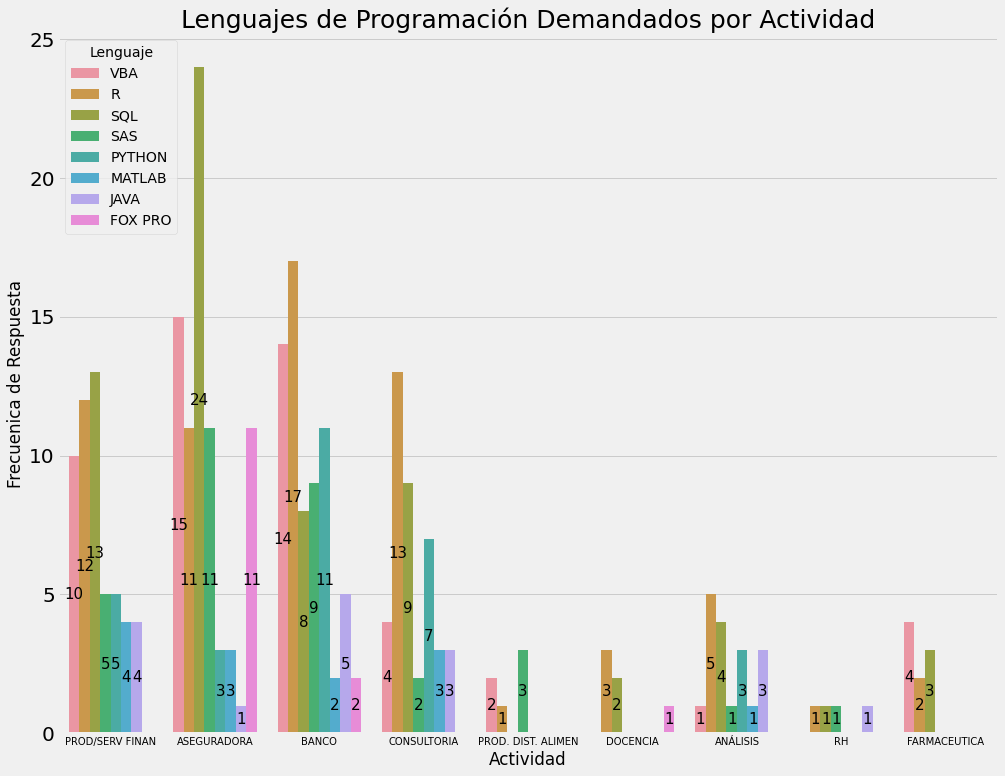

In [375]:
ax = sns.countplot(x = "Actividad",hue = "Lenguaje", data = api_lenguajes)

for container in ax.containers:
    ax.bar_label(container, size = 15, label_type = "center")

plt.title("Lenguajes de Programación Demandados por Actividad", fontsize = 25)
plt.ylabel("Frecuenica de Respuesta")
plt.xlabel("Actividad")
plt.xticks(size = 10)
plt.yticks(size = 20)

# plt.savefig("graf_api_lenguajes",bbox_inches = "tight", pad_inches = 0)

plt.show()

In [387]:
cru9_api_lenguajes = pd.crosstab(index = api_lenguajes.Actividad ,columns = api_lenguajes.Lenguaje, normalize = True, margins = True).style.background_gradient(axis = 1,subset=pd.IndexSlice["ANÁLISIS":"RH", "FOX PRO":"VBA"]).format("{:.2%}")

In [388]:
# dfi.export(cru9_api_lenguajes, "cru9_api_lenguajes.png")

## Deficiencias

In [120]:
stopw = stopwords.words("Spanish")

In [135]:
def df_noaccents(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [161]:
defi = estratos["DEFI_1"].append(estratos["DEFI_2"]).append(estratos["DEFI_3"]).dropna().apply(lambda x: x.lower().split()).to_list()

defi_words = [x for x in list(chain(*defi)) if x not in stopw]

defi_words = list(map(df_noaccents,defi_words))

defi_texto = " ".join(defi_words)#.replace("falta","").replace("conocimiento","").replace(r"^s$","")

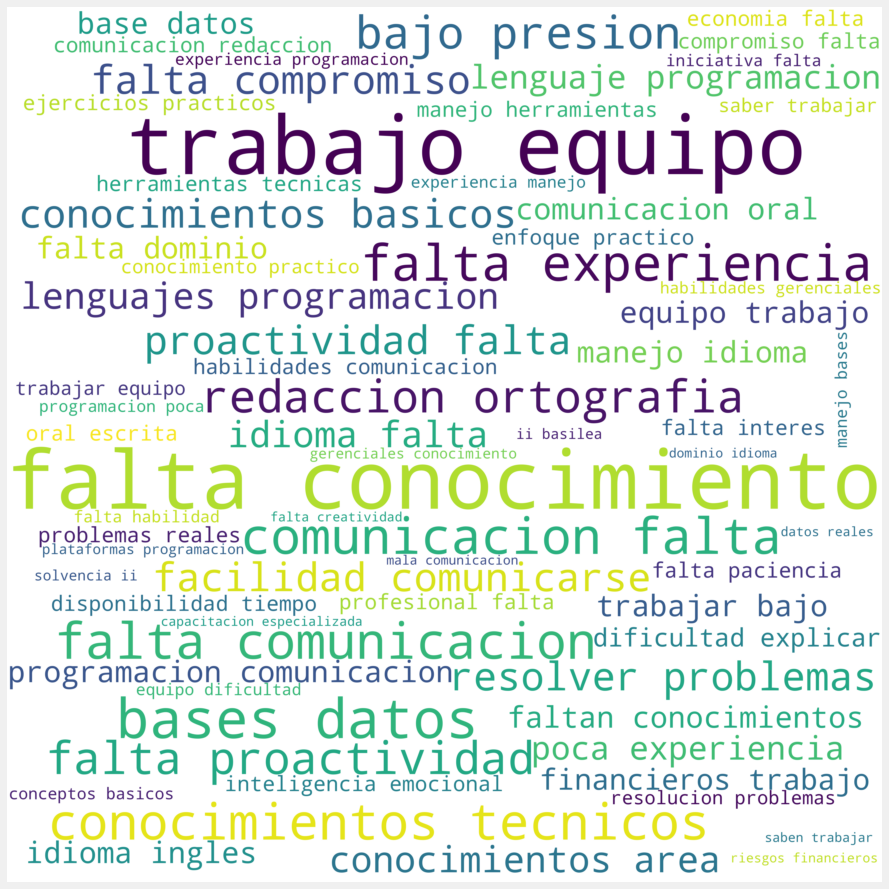

In [164]:
cloud = WordCloud(width = 8000,height = 8000, background_color = "white",max_words = 70,collocation_threshold = 3).generate(defi_texto)
    
plt.figure(figsize=(25,15))
plt.imshow(cloud, interpolation = "bilinear")
#t.title(idioma, fontsize = 20, color = "black")
plt.axis("off")
# plt.savefig("graf_deficiencas" ,bbox_inches = "tight", pad_inches = 0)
plt.show()

# Modelos Estadísticos

##### Kruskal Wallis

In [599]:
modelo_kruskal = estratos[["Actividad","CREA"]].replace({"PRODUCCIÓN Y DISTRIBUCION DE ALIMENTOS":"PROD. DIST. ALIMEN", "PRODUCTOS / SERVICIOS FINANCIEROS":"PROD/SERV FINAN"})

Primero es necesario ver como se distribuyen y ver si se puede asumir uan distribución similar. Solamente tomaré en consideración los 4 primeros grupos con mayores registros.

In [600]:
modelo_kruskal.Actividad.value_counts()

ASEGURADORA           74
BANCO                 56
PROD/SERV FINAN       44
CONSULTORIA           24
ANÁLISIS              11
DOCENCIA              10
FARMACEUTICA           6
PROD. DIST. ALIMEN     5
RH                     4
Name: Actividad, dtype: int64

In [601]:
modelo_kruskal.CREA.value_counts()

5    137
4     69
3     24
2      4
Name: CREA, dtype: int64

In [602]:
modelo_kruskal = modelo_kruskal[(modelo_kruskal.Actividad == "ASEGURADORA") | (modelo_kruskal.Actividad == "BANCO") | (modelo_kruskal.Actividad == "PROD/SERV FINAN") | (modelo_kruskal.Actividad == "CONSULTORIA")]

In [603]:
mod_ASEGURADORA = modelo_kruskal[modelo_kruskal.Actividad == "ASEGURADORA"]["CREA"].to_list()

mod_BANCO = modelo_kruskal[modelo_kruskal.Actividad == "BANCO"]["CREA"].to_list()

mod_FINANCIEROS = modelo_kruskal[modelo_kruskal.Actividad == "PROD/SERV FINAN"]["CREA"].to_list()

mod_CONSULTORIA = modelo_kruskal[modelo_kruskal.Actividad == "CONSULTORIA"]["CREA"].to_list()

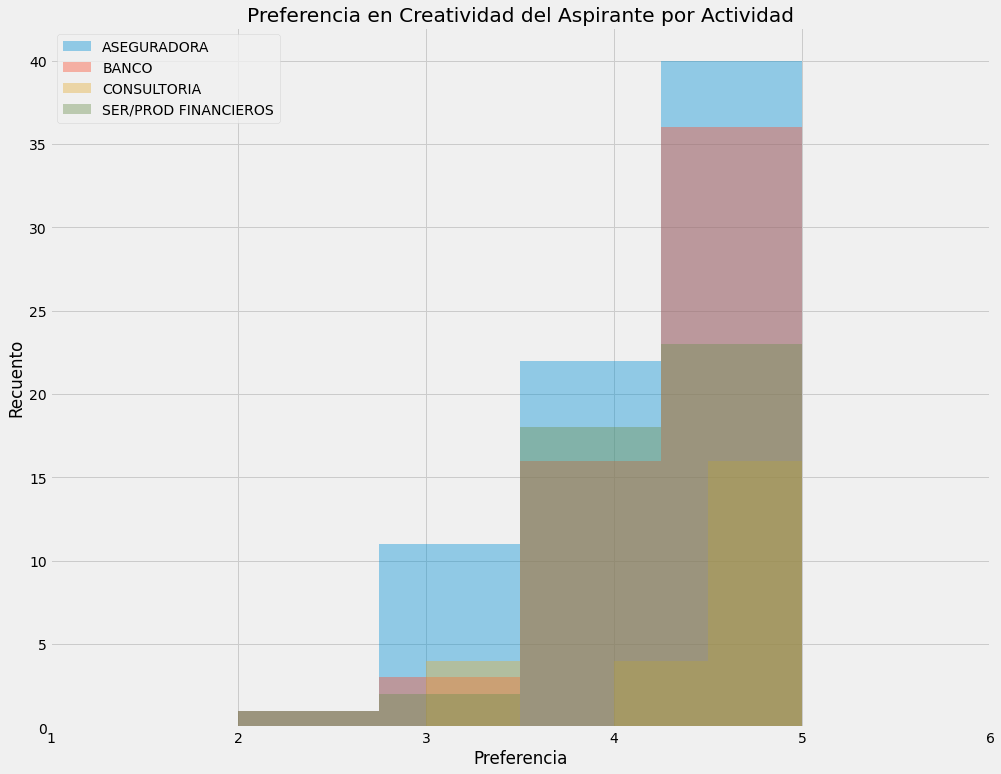

In [604]:
fig, ax = plt.subplots()
for a in [mod_ASEGURADORA, mod_BANCO,mod_CONSULTORIA,mod_FINANCIEROS]:
    sns.distplot(a, bins=4, ax=ax, kde=False)
    
ax.legend(["ASEGURADORA","BANCO","CONSULTORIA","SER/PROD FINANCIEROS"], loc = 'upper left' )
ax.set_xlim([1, 6])
plt.xlabel("Preferencia")
plt.ylabel("Recuento")
plt.title("Preferencia en Creatividad del Aspirante por Actividad")

# plt.savefig("graf_CREA" ,bbox_inches = "tight", pad_inches = 0)

plt.show()

In [596]:
stats.jarque_bera(mod_ASEGURADORA)

Jarque_beraResult(statistic=10.324493561619466, pvalue=0.0057288138262566735)

In [597]:
stats.jarque_bera(mod_BANCO)

Jarque_beraResult(statistic=34.87271506282712, pvalue=2.676000188106542e-08)

In [605]:
stats.jarque_bera(mod_FINANCIEROS)

Jarque_beraResult(statistic=16.396834722943535, pvalue=0.0002750885914439838)

In [606]:
stats.jarque_bera(mod_CONSULTORIA)

Jarque_beraResult(statistic=5.172844648063308, pvalue=0.07528891817242189)

In [607]:
stats.levene(mod_ASEGURADORA,mod_BANCO,mod_FINANCIEROS,mod_CONSULTORIA)

LeveneResult(statistic=0.7406416584501326, pvalue=0.5290050510645593)

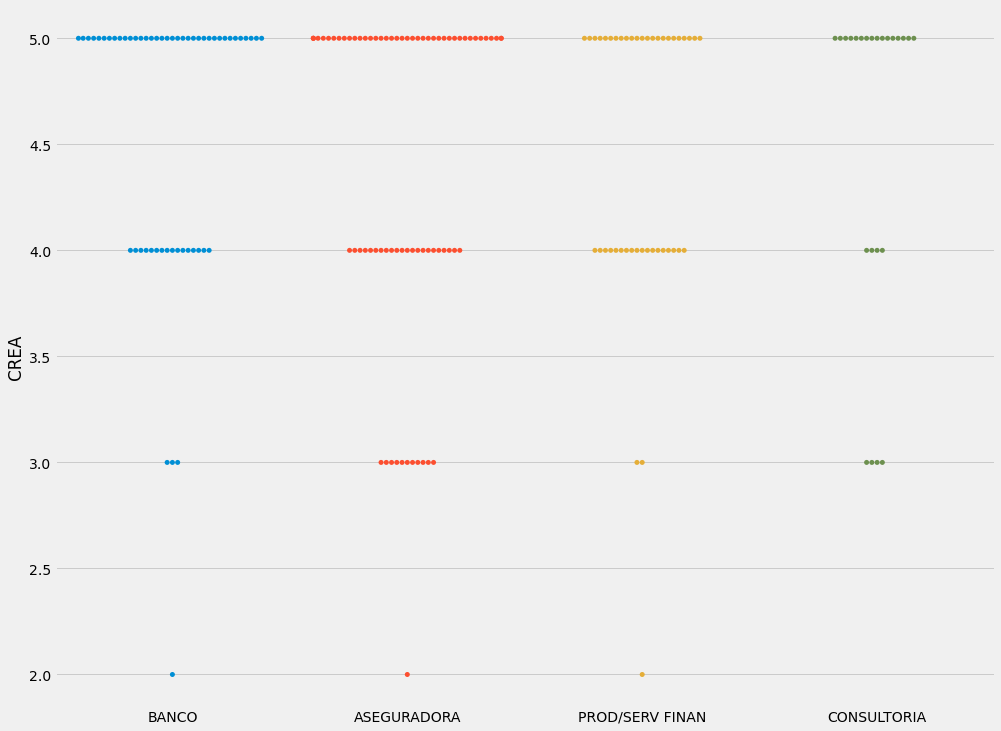

In [611]:
sns.swarmplot(y = "CREA", x = "Actividad",data = modelo_kruskal)
plt.xlabel("") 
# plt.savefig("graf_CREA2" ,bbox_inches = "tight", pad_inches = 0)

plt.show()

In [609]:
stats.kruskal(mod_ASEGURADORA,mod_BANCO,mod_FINANCIEROS,mod_CONSULTORIA)

KruskalResult(statistic=2.4522676358999487, pvalue=0.4839791819272371)

In [610]:
f_oneway(mod_ASEGURADORA,mod_BANCO,mod_FINANCIEROS,mod_CONSULTORIA)

F_onewayResult(statistic=0.7406416584501333, pvalue=0.5290050510645593)